<h1 style="font-family:verdana;"> <center>📚 Sheet Metal 2D Drafting Complexity Estimation through Entity Detection📚</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Complexity Estimation</center></p>
<p><center style="color:#159364; font-family:cursive;">
 <table>
  <tr>
    <th>Name</th>
    <th>Student No</th>
  </tr>
  <tr>
    <td>Sughosh P Dixit</td>
    <td>2021FA04058</td>
  </tr>
 </table>
    Predict the Complexity of a Sheet Metal Drafting.
</center>
</p>
***
    


![Stay Home](https://cdn.dribbble.com/users/14174066/screenshots/20526996/media/f66b62be0d0da0e160a90b26685f7549.png?resize=400x300&vertical=center)
<cite>Image from www.dribbble.com by Yacht Hire</cite>

# Import Required Libraries 🗣
![Stay Home](https://cdn.dribbble.com/users/9263306/screenshots/16675765/media/f59697a91cc48d3204c9a1f7f581a18e.jpg?resize=800x600&vertical=center)
<cite>Image from www.dribbble.com by M K</cite>

In [1]:
import cv2
import numpy as np # linear algebra
from xml.etree import ElementTree as ET
from xml.etree.ElementTree import Element, SubElement
from scipy import optimize
import operator
from math import sqrt, fabs, atan2
import collections
import sys
import random
from itertools import product
from skimage.transform import radon
from numpy import mean, array, argmax
import ezdxf
import time
import os
import PIL

%matplotlib inline 
import pandas as pd #CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from random import randint
# imports for array-handling and plotting
import matplotlib
matplotlib.use('agg')
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


from subprocess import check_output
%matplotlib inline
# hide warnings 
import warnings
warnings.filterwarnings('ignore')

# solve cudNN initialisation 
from tensorflow.compat.v1 import InteractiveSession
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
from PIL import Image
from IPython.display import display

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Constants class 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
        Defining a Constants class to be used in further classes (𝞹) 💭 <br>
    <ol>
        <li>
            PI
        </li>
        <li>
            PRECISION - Keeping the Precision to 10^6 which is further used for normalization and for tolerances
        </li>
        <li>
            PIXEL_PRECISION - Pixel precision is kept to 1 used for pixel tolerances
        </li>
    </ol>
</div>

In [2]:
class Constants:
    PI = 3.14159265358979
    
    #Keeping the Precision to 10^6 which is further used for normalization and for tolerances
    PRECISION = 0.000001
    
    #Pixel precision is kept to 1 used for pixel tolerances
    PIXEL_PRECISION = 1

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Vector 1 class 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
       The class is designed for basic vector manipulation in a 2D space. It provides functionality for operations like vector addition (not explicitly defined), scalar multiplication, normalization, calculating lengths, and computing dot products and perpendicular vectors. 💭 <br>
</div>

In [3]:
class Vector1:
    def __init__ (self):
        self.i = 0
        self.j = 0

    def __init__ (self, other):
        self.i = other.i
        self.j = other.j
        

    def __init__ (self, first, second):
        self.i = first
        self.j = second
        
    #to return an absolute value post any computation
    def __eq__(self, other):
        tol = Constants.PRECISION
        return (fabs(self.i - other.i) < tol and fabs(self.j - other.j) < tol )   
    
    #Joining two points and returning as a vector list
    def __repr__(self):
        return "".join(["Vector1(", str(self.i), ",", str(self.j), ")"])       
    
    #computing the hash value of an input number
    def __hash__(self):
        return hash((self.i, self.j))  
    
    #scalar multiplication
    def __mul__ (self, scalar):
        return Vector1(self.i * scalar, self.j * scalar)
    
    #to return negative of 2 values
    def Negate(self):
        return Vector1(-self.i, -self.j)
    
    #to normalize extreme values for easy computation
    def Normalize(self):
        length = self.Length()
        if ( length < Constants.PRECISION):
            return
        self.i /= length
        self.j /= length
        
        return Vector1(self.i, self.j)
    
    #to compute the Euclidean distance between two points
    def Length(self):
        return (sqrt((self.i * self.i) + (self.j * self.j)))
    
    #to compute the perpendicular of the given vector
    def Perpendicular(self):
        return Vector1(self.j, - self.i)

    #to compute the dot product between another point with the point of the given vector
    def Dot(self, other):
        return ((self.i * other.i) + (self.j * other.j))

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Vector 2 class 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
        Defining another class which is designed for basic vector manipulation in a 2D space. It provides functionality for operations like vector addition (not explicitly defined), scalar multiplication, normalization, calculating lengths, and computing dot products and perpendicular vectors. 💭 <br>
</div>

In [4]:
class Vector2:
    def __init__ (self):
        self.i = 0
        self.j = 0
        self.k = 0

    def __init__ (self, other):
        self.i = other.i
        self.j = other.j
        self.k = other.k
        
    def __init__ (self, first = 0.0, second = 0.0, third = 0.0):
        self.i = first
        self.j = second
        self.k = third
    
    #to return an absolute value post any computation
    def __eq__(self, other):
        tol = Constants.PRECISION
        return (fabs(self.i - other.i) < tol and fabs(self.j - other.j) < tol and fabs(self.k - other.k) < tol  )
    
    #Joining two points and returning as a vector list
    def __repr__(self):
        return "".join(["Vector2(", str(self.i), ",", str(self.j),",", str(self.k), ")"])
    
    #computing the hash value of an input number
    def __hash__(self):
        return hash((self.i, self.j, self.k))

    #scalar multiplication
    def __mul__ (self, scalar):
        return Vector2(self.i * scalar, self.j * scalar, self.k * scalar)
    
    #to normalize extreme values for easy computation
    def Normalize(self):
        length = self.Length()
        if ( length < Constants.PRECISION):
            return
        self.i /= length
        self.j /= length
        self.k /= length
        return Vector2(self.i, self.j, self.k)
    
    #to compute the Euclidean distance between two points
    def Length(self):
        return (sqrt((self.i * self.i) + (self.j * self.j) + (self.k * self.k)))
    
    #to compute the cross product of the given two vector i , j or k
    def Cross(self, other):
        return Vector2(((self.j * other.k)-(self.k * other.j)),((self.k * other.i)-(self.i * other.k)), ((self.i * other.j) - (self.j * other.i)))
    
    #to compute the dot product between another point with the point of the given vector
    def Dot(self, other):
        return ((self.i * other.i) + (self.j * other.j) + (self.k * other.k))
    
    #to return negative of 2 values
    def Negate(self):
        return Vector2(-self.i, -self.j, -self.k)

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Point 2 class 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
       This class, named Point2, represents points in a 2D space and provides various methods for working with these points and performing geometric computations involving them. This class provides functionality for working with 2D points, performing geometric computations like distance calculations, projections, and centroid calculations. 💭 <br>
</div>

![Stay Home](https://cdn.dribbble.com/users/583436/screenshots/1927104/media/92275036942521925a44447a7b9d6acb.gif)
<cite>Image from www.dribbble.com by Dave White</cite>)

In [5]:
class Point2:
    
    #defining x and y coordinates of a point
    def __init__(self):
        self.x = 0
        self.y = 0   
    
    def __init__(self, other):
        self.x = other.x
        self.y = other.y   

    def __init__(self, x_init, y_init ):
        self.x = x_init
        self.y = y_init
    
    #representing it into a vector of x and y coordinates
    def __repr__(self):
        return "".join(["Point2(", str(self.x), ",", str(self.y), ")"])

    #to return an absolute value post any computation
    def __eq__(self, other):
        tol = Constants.PRECISION
        return (fabs(self.x - other.x) < tol and fabs(self.y - other.y) < tol )
    
    #lesser than computation
    def __lt__(self, other):
        return (self.x < other.x and self.y < other.y )
    
    #computing the hash value of an input number
    def __hash__(self):
        return hash((self.x, self.y))
    
    #subtraction to assist in computing the manhattan distance between 2 points
    def __sub__ (self, other):
        return Vector1(self.x - other.x , self.y - other.y)

    #compute addition of the coordinates of two points
    def __add__ (self, other):
        return Point2(self.x + other.x , self.y + other.y)

    def __add__ (self, other):
        return Point2(self.x + other.i , self.y + other.j)

    #compute scalar multiplication of the coordinates of two points
    def __mul__ (self, scalar):
        return Point2((self.x * scalar),(self.y * scalar))
        
    #compute euclidean distance of the coordinates of two points
    def DistanceTo(self, other):
        d= sqrt(((self.x - other.x) * (self.x - other.x)) + ((self.y - other.y) * (self.y - other.y)))
        return d

    #to compute the centroid of multiple points by sum of all points and the total length of the points
    @staticmethod
    def Centroid(points):
        totalX = 0
        totalY =0
        for i in points:
            totalX += i.x
            totalY += i.y
        return Point2(totalX/(len(points)),totalY/(len(points)))

    #to compute the normal vector of input 3 points
    @staticmethod
    def CalculateNormal (first, second, third):
        v1 = Vector2.Vector2( second.x - first.x, second.y - first.y, 0)
        normal = Vector2.Vector2(v1.y, -v1.x, 0)
        normal.Normalize()
        return print('Normal Vector', normal)

    #to check of the two vectors are collinear
    @staticmethod
    def AreCollinear(first, second, third):
        if (first == second or first == third or second == third):
            return True
        v1 = Vector2(first.x - second.x, first.y - second.y, 0)
        v2 = Vector2(first.x - third.x, first.y - third.y, 0)
        angle = Vector2.AngleDeg(v1,v2)
        if ((fabs(angle) < Constants.PRECISION) or (fabs(angle - 180) < Constants.PRECISION)):
            return True
        return False

    #Line projection between two points
    @staticmethod
    def ProjectToLine( p1, p2, p):
        v1 = (p2 - p1)
        denominator = v1.Dot(v1)
        if (fabs(denominator) < Constants.PRECISION):
            return p1
        v2 = (p - p1)
        u = (v1.Dot(v2)) / denominator
        x = p1.x + (u * (p2.x - p1.x))
        y = p1.y + (u * (p2.y - p1.y))

        return Point2(x, y)

    #Direction of Projected line 
    @staticmethod
    def ProjectToLineDirection( point, point1Line, point2Line, linePoint):
        id = point2Line - point1Line
        id.Normalize()

        anotherPointOnLine = (linePoint + (id * 100.0))
        v = (anotherPointOnLine - linePoint)
        denominator = v.Dot(v)
        if ( fabs(denominator) < Constants.PRECISION):
            return linePoint

        vec1 = (point - linePoint)
        vec2 = (anotherPointOnLine - linePoint)

        u = (vec1.Dot(vec2)) / denominator
        return (linePoint + (v * u))

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Point 3 class 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
        This class, named Point3, represents points in a 2D space and provides various methods for working with these points and performing geometric computations involving them. This class provides functionality for working with 2D points, performing geometric computations like distance calculations, projections, and centroid calculations. 💭 <br>
</div>

In [6]:
class Point3:

    def __init__ (self):
        self.x = 0
        self.y = 0
        self.z = 0

    def __init__(self , x_init , y_init , z_init ):
        self.x = x_init
        self.y = y_init
        self.z = z_init

    def __eq__(self, other):
        tol = Constants.PRECISION
        return ( fabs(self.x - other.x) < tol and fabs(self.y - other.y) < tol and fabs(self.z - other.z) < tol)
    
    def __repr__(self):
        return "".join(["Point3(", str(self.x), ",", str(self.y),",", str(self.z), ")"])

    #computing the hash value of an input number
    def __hash__(self):
        return hash((self.x, self.y, self.z))
    
    #subtraction to assist in computing the manhattan distance between 2 points
    def __sub__ (self, other):
        return Vector2(self.x - other.x , self.y - other.y, self.z - other.z)

    #compute addition of the coordinates of two points
    def __add__ (self, other):
        return Point3(self.x + other.i, self.y + other.j, self.z + other.k)

    #compute scalar multiplication of the coordinates of two points
    def __mul__ (self, scalar):
        return Point3((self.x * scalar),(self.y * scalar), (self.z * scalar))

    #compute euclidean distance of the coordinates of two points
    def DistanceTo(self, other):
        d = sqrt(((self.x - other.x) * (self.x - other.x)) + ((self.y - other.y) * (self.y - other.y)) + ((self.z - other.z) * (self.z - other.z)))
        return d

    #to compute the centroid of multiple points by sum of all points and the total length of the points
    @staticmethod    
    def Centroid(Points):
        
        totalX = 0
        totalY = 0
        totalZ = 0
        for i in Points:
            totalX += i.x
            totalY += i.y
            totalZ += i.z
        return Point3(totalX/(len(Points)), totalY/(len(Points)), totalZ/(len(Points)))

    #to compute the normal vector of input 3 points
    @staticmethod
    def CalculateNormal (first, second, third):
        v1 = Vector2( second.x - first.x, second.y - first.y, second.z - first.z)
        v2 = Vector2( third.x - second.x, third.y - second.y, third.z - second.z)
        normal = v1.Cross(v2)
        normal.Normalize()
        return normal

    #to check of the two vectors are collinear
    @staticmethod
    def AreCollinear(first, second, third):
        if (first == second or first == third or second == third):
            return True
        
        v1 = Vector2(first.x - second.x, first.y - second.y, first.z - second.z)
        v2 = Vector2(first.x - third.x, first.y - third.y, first.z - third.z)
        angle = Vector2.AngleDeg(v1,v2)
       
        if ((fabs(angle) < Constants.PRECISION) or (fabs(angle - 180) < Constants.PRECISION)):
            return True
        return False
    
    def ToPoint2(self):
        return Point2(self.x , self.y)

    #Line projection between two points
    @staticmethod
    def Project(point, planePt, planeNorm):
        planeNormal = planeNorm.Normalize()
        v = point - planePt
        dot = v.Dot(planeNormal)
        dv = planeNormal * dot
        return Point3(point.x - dv.i, point.y - dv.j, point.z - dv.k)

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Mathematical Utilities class 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
       The MathUtils class is designed to be a collection of utility methods for performing various mathematical calculations and geometric operations. It provides static methods to handle different geometric scenarios. The class provides a variety of methods for handling geometric calculations involving points, lines, planes, angles, distances, and intersections. It is intended for use in various applications involving computational geometry and geometric modeling. 💭 <br>
</div>

![Stay Home](https://cdn.dribbble.com/userupload/8257872/file/original-1d77a6a5b062872a94ad2410e5f4f86e.png?resize=752x588)
<cite>Image from www.dribbble.com by Dave White</cite>)

In [7]:
class MathUtils:

    @staticmethod
    def EQTF(a, b, tol):
        tol = Constants.PRECISION
        return (fabs(a - b) < tol)

    @staticmethod
    def  RadToDeg(angle):
        return (57.2957795130823208768 * angle)

    @staticmethod
    def DegToRad(angle):
        return (0.01745329251994329577 * angle)
    
    @staticmethod
    def IsInTriangle(p, a, b, c):
        inside = True
        v1 = b - a
        v2 = c - a
        v3 = p - a
        normal = v1.Cross(v2)
        tempVec = v1.Cross(v3)
        if ( tempVec.Dot(normal) < 0):
             inside = False
        else:
            tempVec = (c - a).Cross(p - b)
            if ( tempVec.Dot(normal) < 0):
                inside = False
            else:
                tempVec = (a - c).Cross(p - c)
                if ( tempVec.Dot(normal) < 0):
                    inside = False
        return inside

    @staticmethod
    def ProjectToPlane(point, planeNormal, planePoint):
        normal = planeNormal
        normal.Normalize()
        v1 = point - planePoint
        distance = v1.Dot(normal)
        return Point3((point.x - (normal.i * distance)), (point.y - (normal.j * distance)), (point.z - (normal.k * distance)))


    @staticmethod
    def CalculateInnerAngleDeg( pointBefore, basePoint, pointAfter):
        v1 = pointBefore - basePoint
        v2 = pointAfter - basePoint
        nomvec = Point3.CalculateNormal(pointBefore, basePoint, pointAfter)
        normal = nomvec
        angle = v1.AngleDeg(v1, v2)

        if (normal.k > 0):
            angle = 360 - angle
        return angle


    @staticmethod
    def ProjectToLineDirection( point, lineDirection, linePoint):
        id = lineDirection
        id.Normalize()

        anotherPointOnLine = (linePoint + (id * 100.0))
        v = (anotherPointOnLine - linePoint)
        denominator = v.Dot(v)
        if ( fabs(denominator) < Constants.PRECISION):
            return linePoint

        vec1 = (point - linePoint)
        vec2 = (anotherPointOnLine - linePoint)

        u = (vec1.Dot(vec2)) / denominator
        return (linePoint + (v * u))


    @staticmethod
    def ProjectToLine( p1, p2, p):
        v1 = (p2 - p1)
        denominator = v1.Dot(v1)
        if (fabs(denominator) < Constants.PRECISION):
            return p1
        v2 = (p - p1)
        u = (v1.Dot(v2)) / denominator
        x = p1.x + (u * (p2.x - p1.x))
        y = p1.y + (u * (p2.y - p1.y))
        z = p1.z + (u * (p2.z - p1.z))

        return Point3(x, y, z)

    @staticmethod
    def ProjectToLine2( p1, p2, p):
        v1 = (p2 - p1)
        denominator = v1.Dot(v1)

        if (fabs(denominator) < Constants.PRECISION):
            return p1

        v2 = (p - p1)
        u = (v1.Dot(v2)) / denominator
        x = p1.x + (u * (p2.x - p1.x))
        y = p1.y + (u * (p2.y - p1.y))

        return Point2(x, y)


    @staticmethod
    def Distance_PointToPlane(point, planePoint, planeNormal):
        normal = planeNormal.Normalize()
        v = (point - planePoint)
        return fabs(v.Dot(normal))


    @staticmethod
    def DistanceSigned_PointToPlane(point, planePoint, planeNormal):
        normal = planeNormal.Normalize()
        v = (point - planePoint)
        return (v.Dot(normal))


    @staticmethod
    def Distance_PointToLine(lineStart, dir, point):
        direction = dir.Normalize()
        lineEnd = lineStart + (direction * 100.0)
        projection = MathUtils.ProjectToLine(lineStart, lineEnd, point)
        return point.DistanceTo(projection)

    @staticmethod
    def Distance_PointToLine2(lineStart, dir, point):
        direction = dir.Normalize()
        lineEnd = lineStart + (direction * 100.0)
        projection = MathUtils.ProjectToLine2(lineStart, lineEnd, point)
        return point.DistanceTo(projection)

    @staticmethod
    def Distance_PointToLinePoint(lineStart, lineEnd, point):
        dir = lineEnd - lineStart
        direction = dir.Normalize()
        lineEnd = lineStart + (direction * 100.0)
        projection = MathUtils.ProjectToLine2(lineStart, lineEnd, point)
        return point.DistanceTo(projection)

    @staticmethod
    def MinDistance_PointToLineSegment(lineStart, lineEnd, point):
        projection = MathUtils.ProjectToLine2(lineStart, lineEnd, point)
        d1 = lineStart.DistanceTo(point)
        d2 = lineEnd.DistanceTo(point)
        dp = projection.DistanceTo(point)
        minDist = d1
        nearestPoint = lineStart
        if d2 < minDist:
            minDist = d2
            nearestPoint = lineEnd
        if dp < minDist:
            minDist = dp
            nearestPoint = projection
        return minDist, nearestPoint

    @staticmethod
    def areSame(a, b):
        return ((a <= b + Constants.PRECISION) and (a >= b - Constants.PRECISION))

    @staticmethod
    def areSame(v1, v2):
        return (MathUtils.areSame(v1.i, v2.i) and MathUtils.areSame(v1.j, v2.j) and MathUtils.areSame(v1.k, v2.k))

    @staticmethod
    def CheckForCoincidentLineSegments( p1, p2, p3, p4):
        tolerance = Constants.PRECISION
        if (MathUtils.Distance_PointToLinePoint(p3, p2, p1) < tolerance):
            return True
        if (MathUtils.Distance_PointToLinePoint(p4, p2, p1) < tolerance):
            return True
        if (MathUtils.Distance_PointToLinePoint(p1, p4, p3) < tolerance):
            return True
        if (MathUtils.Distance_PointToLinePoint(p2, p4, p3) < tolerance):
            return True
        return False
    

    @staticmethod
    def Check_Intersects_LineSegmentLineSegment(p1, p2, p3, p4):
        tolerance = Constants.PRECISION
        Pixeltolerance =  Constants.PIXEL_PRECISION

        x1 = p1.x
        x2 = p2.x
        x3 = p3.x
        x4 = p4.x
        y1 = p1.y
        y2 = p2.y
        y3 = p3.y
        y4 = p4.y

        numeratorA = ((x4 - x3) * (y1 - y3)) - ((y4 - y3) * (x1 - x3))
        numeratorB = ((x2 - x1) * (y1 - y3)) - ((y2 - y1) * (x1 - x3))
        denominator = ((y4 - y3) * (x2 - x1)) - ((x4 - x3) * (y2 - y1))

        if (MathUtils.EQTF(denominator, 0.0, tolerance)):
            if(MathUtils.EQTF(numeratorB, 0.0, tolerance) and MathUtils.EQTF(numeratorA, 0.0, tolerance)):
                return MathUtils.CheckForCoincidentLineSegments(p1, p2, p3, p4)
            return False                 #False..but to check for Boundingbox touching we changed it to True.
        ua = numeratorA / denominator
        ub = numeratorB / denominator

        if((ua > (0.0 - Pixeltolerance)) and (ua < (1.0 + Pixeltolerance)) and (ub > (0.0 - Pixeltolerance)) and (ub < (1.0 + Pixeltolerance))):
            intersection = p1 + (p2 -p1) * ua
            return True
        return False

    @staticmethod
    def Intersects_LineSegmentLineSegment(p1, p2, p3, p4):
        tolerance = Constants.PRECISION

        x1 = p1.x
        x2 = p2.x
        x3 = p3.x
        x4 = p4.x
        y1 = p1.y
        y2 = p2.y
        y3 = p3.y
        y4 = p4.y

        numeratorA = ((x4 - x3) * (y1 - y3)) - ((y4 - y3) * (x1 - x3))
        numeratorB = ((x2 - x1) * (y1 - y3)) - ((y2 - y1) * (x1 - x3))
        denominator = ((y4 - y3) * (x2 - x1)) - ((x4 - x3) * (y2 - y1))

        if (MathUtils.EQTF(denominator, 0.0, tolerance)):
            if(MathUtils.EQTF(numeratorB, 0.0, tolerance) and MathUtils.EQTF(numeratorA, 0.0, tolerance)):
                areCoincident = MathUtils.CheckForCoincidentLineSegments(p1, p2, p3, p4)
                return areCoincident, None
            return False, None

        ua = numeratorA / denominator
        ub = numeratorB / denominator

        if((ua > (0.0 - tolerance)) and (ua < (1.0 + tolerance)) and (ub > (0.0 - tolerance)) and (ub < (1.0 + tolerance))):
            intersection = p1 + (p2 -p1) * ua
            return True, intersection

        return False, None

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Line class 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
        Defining a Line Classs which has a start and end point to predict the direction, length and tell if the line is degenerate as well as flag a point if it exists on a line or not. The class represents line segments in a 2D space, providing methods to calculate their properties and relationships with points. It represents line segments in a 2D space and provides methods to calculate their direction, length, check for degeneracy, and determine whether a point lies on the line segment.💭 <br>
</div>

In [8]:
class Line2:
    def __init__ (self):
        self.startPoint = Point2(0, 0)
        self.endPoint = Point2(0, 0)

    def __init__(self, other):
        self.startPoint = other.startPoint
        self.endPoint = other.endPoint

    def __init__(self, point1, point2):
        if (point1.x < point2.x):
            self.startPoint = point1
            self.endPoint = point2
        elif (point1.x > point2.x):
            self.startPoint = point2
            self.endPoint = point1
        elif (point1.y < point2.y):
            self.startPoint = point1
            self.endPoint = point2
        elif (point1.y > point2.y):
            self.startPoint = point2
            self.endPoint = point1
        else:
            self.startPoint = point1
            self.endPoint = point2
        
    def __repr__(self):
        return "".join(["Line(", str(self.startPoint), ",", str(self.endPoint), ")"])

    def Direction(self):
        v = (self.endPoint - self.startPoint)
        v.Normalize()
        return v
    
    def Length(self):
        return sqrt(((self.endPoint.x - self.startPoint.x) * (self.endPoint.x - self.startPoint.x)) + ((self.endPoint.y - self.startPoint.y) * (self.endPoint.y - self.startPoint.y)))

    def IsDegenerate(self):
        s = self.startPoint
        e = self.endPoint
        v = e - s
        denominator = v.Dot(v)
        tol = 2 * Constants.PIXEL_PRECISION     
     
        if ( fabs(denominator) < tol):
            return True
        return False

    def OnLine(self, point):
        s = self.startPoint
        e = self.endPoint
        dir = e - s
        dir.Normalize()
        d = MathUtils.Distance_PointToLine2(s, dir, point)
        if(d <= 5):             
            return True
        return False

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Feature Extraction 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
        The provided code defines a series of classes used for managing and storing various features extracted from images or drawings. These features represent different geometric entities and dimensions, and the classes are designed to encapsulate and store the relevant information. The significance of these classes is to provide a structured way to store and manage information about different geometric entities and dimensions detected in images or drawings. The classes allow for encapsulating data and functionality related to each type of feature, enabling easier manipulation, storage, and interaction with the detected features. The FeatureManager class acts as a centralized point to store all extracted feature information, making it easier to manage and work with various types of detected entities in a cohesive manner. 💭 <br>
</div>

In [9]:
class ArrowHeads():

    def __init__(self):
        self._BoundingBoxP1 = Point2(0,0)
        self._BoundingBoxP2 = Point2(0,0)
        self._ArrowCenter = Point2(0,0)
        self._Direction = ""

    def __hash__(self):
        return hash((self._BoundingBoxP1, self._BoundingBoxP2, self._ArrowCenter, self._Direction))

    def __repr__(self):
        return "".join(["ArrowHead ( P1 = ", str(self._BoundingBoxP1), ", P2 = ", str(self._BoundingBoxP2),", Center = ", str(self._ArrowCenter),", Direction = ", str(self._Direction),")"])

    @staticmethod
    def ExtractArrowHead(self,p1, p2, center):
        self._BoundingBoxP1 = p1
        self._BoundingBoxP2 = p2
        self._ArrowCenter = center

class DimensionalLines():

    def __init__(self):
        self._ArrowHeads = ArrowHeads()
        self._Leaders = Line2(Point2(0,0),Point2(2,2))

    def __hash__(self):
        return hash((self._ArrowHeads, self._Leaders))

    def __repr__(self):
        return "".join(["DimensionalLine (", str(self._ArrowHeads), "), Leaders (", str(self._Leaders),")"])

    @staticmethod
    def ExtractDimensionalLine(self,arrows, leaders):
        self._ArrowHeads = arrows
        self._Leaders = leaders

class DimensionalTexts():

    def __init__(self):
        self._Text = "Sughosh"
        self._TextBoxP1 = Point2(0,0)
        self._TextBoxP2 = Point2(0,0)
        self._Orientation = 90        

    def __hash__(self):
        return hash((self._Text, self._TextBoxP1, self._TextBoxP2, self._Orientation))

    def __repr__(self):
        return "".join(["DimensionalText ( Text = ", str(self._Text), ", P1 = ", str(self._TextBoxP1),", P2 = ", str(self._TextBoxP2),", Orientation = ", str(self._Orientation),")"])

    @staticmethod
    def ExtractDimensionalText(self, dimensionText, p1, p2, orientationAngle):
        self._Text = dimensionText
        self._TextBoxP1 = p1
        self._TextBoxP2 = p2
        self._Orientation = orientationAngle

class Dimensions():

    def __init__(self):
        self._DimensionalLines = DimensionalLines()  
        self._DimensionalText = DimensionalTexts()
        self._SupportLines = []

       
    def __hash__(self):
        return hash((self._DimensionalLines, self._DimensionalText, self._SupportLines))

    def __repr__(self):
        return "".join(["Dimension (", str(self._DimensionalLines), "), (", str(self._DimensionalText), ")", ", (", str(self._SupportLines), ")"])
    
    @staticmethod   
    def ExtractDimension(self, Dimensionallines, Dimensionaltext ):
        self._DimensionalLines = Dimensionallines
        self._DimensionalText = Dimensionaltext

class CorrelatedEntity():

    def __init__(self):
        self._Dimension = Dimensions()  
        self._Entity = []
       
    def __hash__(self):
        return hash((self._Dimension, self._Entity))
    
    def __repr__(self):
        return "".join(["CorrelatedEntity (", str(self._Dimension), "), (", str(self._Entity), ")"])

    @staticmethod   
    def ExtractCorrelatedEntity(self, Dim, cEntity ):
        self._Dimension = Dim
        self._Entity = cEntity
        
class ExtractedLines():
    _rho = 0
    _theta = 0
    _p1 = Point2(0,0)
    _p2 = Point2(0,0)

    def __init__(self):
        self._rho = 0
        self._theta = 0
        self._p1 = Point2(0,0)
        self._p2 = Point2(0,0)

    def __eq__(self, other):
        tol = 1.0
        return (fabs(self._rho - other._rho) < tol and fabs(self._theta - other._theta) < tol )

    def __hash__(self):
        return hash((self._rho, self._theta, self._p1, self._p2))

    def __repr__(self):
        return "".join(["line (rho =", str(self._rho), ", theta =", str(self._theta),", Point1 = ", str(self._p1),", Point2 =", str(self._p2), ")"])
    
    @staticmethod   
    def ExtractLine(self,rho, theta, p1, p2):
        self._rho = rho
        self._theta = theta
        self._p1 = p1
        self._p2 = p2

class ExtractedCircles():
    _centre = Point2(0,0)
    _radius = 0

    def __init__(self):
        
        self._centre = Point2(0,0)
        self._radius = 0
        self._pixels = []

    def __eq__(self, other):
        tol = 4.0
        return (fabs(self._centre - other._centre) < tol and fabs(self._radius - other._radius) < tol )

    def __hash__(self):
        return hash((self._centre, self._radius))

    def __repr__(self):
        return "".join(["Circle (Centre =", str(self._centre), ", Radius =", str(self._radius), ")"])
    
    @staticmethod   
    def ExtractCircle(self,centre, radius):
        self._centre = centre
        self._radius = radius
        
class ExtractedText():

    _p1 = Point2(0,0)
    _p2 = Point2(0,0)
    _text = ""
    _cropedImg = np.zeros([100,100,3],dtype=np.uint8)

    def __init__(self):
        
        self._p1 = Point2(0,0)
        self._p2 = Point2(0,0)
        self._text = ""
        self._cropedImg = np.zeros([100,100,3],dtype=np.uint8)

    def __hash__(self):
        return hash((self._p1, self._p2, self._text, self._cropedImg))

    def __repr__(self):
        return "".join(["ExtractedText p1=", str(self._p1), ", p2 =", str(self._p2),", DetectedText = ", str(self._text),", PathOfImg =", str(self._cropedImg), ")"])
    
    @staticmethod   
    def ExtractText(self,p1, p2, text, path):
        self._p1 = p1
        self._p2 = p2
        self._text = text
        self._cropedImg = path

class FeatureManager():

    def __init__(self):
        self._DetectedArrowHead = ArrowHeads()
        self._DetectedDimensionalLine = DimensionalLines()
        self._DetectedDimensionalText = DimensionalTexts()
        self._DetectedDimension = Dimensions()
        self._DetectedLine = []
        self._DetectedCircle = ExtractedCircles()
        self._CorrelatedEntities = CorrelatedEntity()
        self._ImagePath = "1.png"
        self._RootDirectory = "Output/temp/"
        self._ImageOriginal = np.zeros((3,3), dtype = np.uint8)
        self._ImageCleaned = np.zeros((3,3), dtype = np.uint8)
        self._ImageDetectedArrow = np.zeros((3,3), dtype = np.uint8)
        self._ImageDetectedDimensionalLine = np.zeros((3,3), dtype = np.uint8)
        self._ImageDetectedDimensionalText = np.zeros((3,3), dtype = np.uint8)
        self._ImageDetectedLine = np.zeros((3,3), dtype = np.uint8)
        self._ImageDetectedCircle = np.zeros((3,3), dtype = np.uint8)

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Eraser class 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
        Setting the image's to (255,255,255) rbg color as part of erasure of the image. The significance of the Eraser class and its methods is to provide a set of utility functions for erasing specific shapes or pixels from images. These methods can be useful in image editing, where certain regions or shapes need to be removed or masked. The class encapsulates these erasing operations and abstracts the complexity of OpenCV functions, making it easier to perform erasing tasks on images. 💭 <br>
</div>

In [10]:
import cv2
#from Point2 import Point2

class Eraser():

    @staticmethod
    def ErasePixel(img, pixel):
        img.itemset((pixel[0], pixel[1], 0), 255)
        img.itemset((pixel[0], pixel[1], 1), 255)
        img.itemset((pixel[0], pixel[1], 2), 255)
        return img

    @staticmethod
    def EraseLine(img, p1, p2):
        P1 = (int(p1.x), int(p1.y))
        P2 = (int(p2.x), int(p2.y))
        Eraser.checkForVicinity(img,p1,p2)
        cv2.line(img, P1, P2, (255,255,255),5)
        return img

    @staticmethod
    def checkForVicinity(img, p1, p2):
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret,img_thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        pmid = Point2(int((p1.x + p2.x)/2),int((p1.y + p2.y)/2))
        pixelPresent = 1
        if img_thresh[(pmid.y)+1, (pmid.x)+1] == 0:
            pixelPresent +=1
        if img_thresh[(pmid.y)-1, (pmid.x)-1] == 0:
            pixelPresent +=1
        if img_thresh[(pmid.y)+2, (pmid.x)+2] == 0:
            pixelPresent +=1
        if img_thresh[(pmid.y)-2, (pmid.x)-2] == 0:
            pixelPresent +=1
        if pixelPresent == 4:
            if img_thresh[(pmid.y)+3, (pmid.x)+3] == 0 or img_thresh[(pmid.y)-3, (pmid.x)-3] == 0 :
                pixelPresent +=1

        return pixelPresent

    @staticmethod
    def EraseBox(img, p1, p2):
        P1 = (p1.x, p1.y)
        P2 = (p2.x, p2.y)
        cv2.rectangle(img, P1, P2, (255,255,255), -1)
        return img

    @staticmethod
    def EraseCircle(img, p1, radius):
        P1 = (int(p1.x), int(p1.y))
        Radius = (int(radius))
        cv2.circle(img, P1, Radius, (255,255,255),2) 
        return img

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Cognition Class 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
         The Cognition class contains a collection of static methods that implement various geometric and analytical operations for processing and analyzing different types of entities like lines, line segments, dimensions, arrows, and more. These methods are used to perform calculations related to intersections, orientations, proximity correlations, arrowhead directions, thickness analysis, distance transforms, and more. This class is crucial for the analysis and manipulation of geometric entities in the context of computer-aided design (CAD) or image processing. 💭 <br>
        <p style="line-height:1.7em;"> These are collection of classes and static methods that work together to perform various geometric and analytical operations on CAD or image data. These operations include intersection checks, proximity analysis, orientation calculations, dimension extraction, thickness analysis, and more. The code is meant to assist in the analysis and manipulation of design or image data in the context of geometry processing. <br>
</div>

In [11]:
class Cognition():

    @staticmethod
    def GetUParam(c1, line):
        startpt = line.startPoint
        endpt = line.endPoint
        denominator = fabs(endpt.x - startpt.x)
        tolerance = 1.0
        U = 0
        if denominator < tolerance :
            U = float((c1.y - startpt.y) / (endpt.y - startpt.y))
        else:
            U = float((c1.x - startpt.x) / (endpt.x - startpt.x))
        return U

    @staticmethod
    def angle_trunc(a):
        while a < 0.0:
            a += Constants.PI * 2
        return a
    
    @staticmethod
    def getAngleBetweenLineAndAxis(p1,p2):
        line = Line2(p1,p2)
        up1 = Cognition.GetUParam(p1,line)
        up2 = Cognition.GetUParam(p2,line)
        if up2 > up1:
            deltaY = p2.y - p1.y
            deltaX = p2.x - p1.x
        else:
            deltaY =  - p1.y - p2.y
            deltaX =  - p1.x - p2.x
        radians = Cognition.angle_trunc(atan2(deltaY, deltaX))
        degrees = MathUtils.RadToDeg(radians)
        degrees = (360 - degrees)
        return degrees

    @staticmethod
    def CheckForCoincidentLineSegments( p1, p2, p3, p4):
        v = p4 - p3
        w = p1 - p3
        w2 = p2 - p3
        if (v.i != 0):
            t0 = (w.i / v.i)
            t1 = (w2.i / v.i)
        else:
            t0 = (w.j / v.j)
            t1 = (w2.j / v.j)
        if (t0 > t1):
            t = t0
            t0 = t1
            t1 = t
        if (t0 > 1 or t1 < 0):
            return False
        return True

    @staticmethod
    def CheckIfIntersectingLineSegment(p1, p2, p3, p4):
        tolerance = Constants.PRECISION
        Pixeltolerance = 0.5 
        x1 = p1.x
        x2 = p2.x
        x3 = p3.x
        x4 = p4.x
        y1 = p1.y
        y2 = p2.y
        y3 = p3.y
        y4 = p4.y
        numeratorA = ((x4 - x3) * (y1 - y3)) - ((y4 - y3) * (x1 - x3))
        numeratorB = ((x2 - x1) * (y1 - y3)) - ((y2 - y1) * (x1 - x3))
        denominator = ((y4 - y3) * (x2 - x1)) - ((x4 - x3) * (y2 - y1))

        if (MathUtils.EQTF(denominator, 0.0, tolerance)):
            if(MathUtils.EQTF(numeratorB, 0.0, tolerance) and MathUtils.EQTF(numeratorA, 0.0, tolerance)):
                return Cognition.CheckForCoincidentLineSegments(p1, p2, p3, p4)
            return False                 
        ua = numeratorA / denominator
        ub = numeratorB / denominator

        if((ua > (0.0 - Pixeltolerance)) and (ua < (1.0 + Pixeltolerance)) and (ub > (0.0 - Pixeltolerance)) and (ub < (1.0 + Pixeltolerance))):
            return True
        return False

    @staticmethod
    def CheckIfOverlap(BB1_P1, BB1_P2, BB2_P1, BB2_P2):
        if BB1_P2.x < BB2_P1.x or BB2_P2.x < BB1_P1.x or BB1_P2.y < BB2_P1.y or BB2_P2.y < BB1_P1.y:
            return False
        return True

    @staticmethod
    def CheckOverlapByLineSegment(B1_P1, B1_P2, B2_P1, B2_P2):
        Ap1 = Point2(B1_P1.x, B1_P1.y)
        Ap2 = Point2(B1_P2.x, B1_P1.y)
        Ap3 = Point2(B1_P2.x, B1_P2.y)
        Ap4 = Point2(B1_P1.x, B1_P2.y)

        Bp1 = Point2(B2_P1.x, B2_P1.y)
        Bp2 = Point2(B2_P2.x, B2_P1.y)
        Bp3 = Point2(B2_P2.x, B2_P2.y)
        Bp4 = Point2(B2_P1.x, B2_P2.y)

        A_Segments = [Line2(Ap1, Ap2), Line2(Ap2, Ap3), Line2(Ap3, Ap4), Line2(Ap4, Ap1)]
        B_Segments = [Line2(Bp1, Bp2), Line2(Bp2, Bp3), Line2(Bp3, Bp4), Line2(Bp4, Bp1)]

        for i in A_Segments:
            p1 = i.startPoint
            p2 = i.endPoint
            for j in B_Segments:
                p3 = j.startPoint
                p4 = j.endPoint
                Intersects = Cognition.CheckIfIntersectingLineSegment(p1, p2, p3, p4)
                if Intersects == True:
                    return True
        return False
        
    @staticmethod
    def CheckIfOverlapLineSegments(Rect1_Segments, Rect2_Segments):
        for i in Rect1_Segments:
            p1 = i.startPoint
            p2 = i.endPoint
            for j in Rect2_Segments:
                p3 = j.startPoint
                p4 = j.endPoint
                Intersects = MathUtils.Check_Intersects_LineSegmentLineSegment(p1, p2, p3, p4)
                if Intersects == True:
                    return True
        return False

    @staticmethod
    def CollisionSegmentBox(bbMin, bbMax, startPt, endPt):
        direction = endPt - startPt
        direction = direction.Normalize()
        divx = 1 / direction.i
        if (divx >= 0):
            tminX = (bbMin.x - startPt.x) * divx
            tmaxX = (bbMax.x - startPt.x) * divx
        else:
            tminX = (bbMax.x - startPt.x) * divx
            tmaxX = (bbMin.x - startPt.x) * divx
        
        tmin = max(tminX,tmaxX)
        tmax = min(tminX, tmaxX)

        divy = 1 / direction.j
        if (divy >= 0):
            tminY = (bbMin.y - startPt.y) * divy
            tmaxY = (bbMax.y - startPt.y) * divy
        else:
            tminY = (bbMax.y - startPt.y) * divy
            tmaxY = (bbMin.y - startPt.y) * divy
        
        tmin = max(tmin, min(tmaxY,tminY))
        tmax = min(tmax, max(tmaxY,tminY))

        return tmax >= tmin

    @staticmethod
    def LineEquation(p1, p2):
        slope = (p2.y - p1.y) / (p2.x - p1.x)
        c = p1.y - (slope * p1.x)
        return slope, c  
    
    @staticmethod
    def LineCoefficients(p1, p2):
        A = p2.y - p1.y
        B = p1.x - p2.x
        C = (A * p1.x) + (B * p1.y)
        return A, B, C 

    @staticmethod
    def SortPointsByUParam(points, line):
        sortedPointsDict = {}
        for p in points:
            u = Cognition.GetUParam(p,line)        
            sortedPointsDict[u] = p
        keys = sortedPointsDict.keys()
        sortedKeys = sorted(keys)
        sortedPoints = []
        for i in range(0, len(sortedKeys)):
            key = sortedKeys[i]
            point = sortedPointsDict[key]
            sortedPoints.append(point)
        return sortedPoints

    @staticmethod
    def SortDictionary(d):
        od = collections.OrderedDict(sorted(d.items()))
        return od

    @staticmethod
    def GetOrientation(Dimensionallines,BB):
        text_P1 = Point2(BB[0]-5,BB[1]-5)
        text_P2 = Point2(BB[0]+BB[2]+5,BB[1]-5)
        text_P3 = Point2(BB[0]+BB[2]+5,BB[1]+BB[3]+5)
        text_P4 = Point2(BB[0]-5,BB[1]+BB[3]+5)

        line = Line2(text_P1,text_P3)
        up1 = Cognition.GetUParam(text_P1,line) 
        up2 = Cognition.GetUParam(text_P3,line)
        if up2 > up1:
            Rect1_p1 = text_P1
            Rect1_p2 = text_P3            
        else:
            Rect1_p1 = text_P3
            Rect1_p2 = text_P1
        Rect1_p3 = text_P2
        Rect1_p4 = text_P4
        OrientationAngle = 0
        for i in Dimensionallines:
            for l in i._Leaders:
                line = l
                P1 = l.startPoint
                P2 = l.endPoint
                Rect2_p1 = Point2(P1.x-6, P1.y-6)
                Rect2_p2 = Point2(P2.x+6, P2.y+6)
                Rect2_p3 = Point2(P2.x+6,P2.y-6)
                Rect2_p4 = Point2(P1.x-6,P1.y+6)
                Rect1_Segments = [Line2(Rect1_p1, Rect1_p2), Line2(Rect1_p2, Rect1_p3), Line2(Rect1_p3, Rect1_p4), Line2(Rect1_p4, Rect1_p1)]
                Rect2_Segments = [Line2(Rect2_p1, Rect2_p2), Line2(Rect2_p2, Rect2_p3), Line2(Rect2_p3, Rect2_p4), Line2(Rect2_p4, Rect2_p1)]
                overlap = Cognition.CheckIfOverlapLineSegments(Rect1_Segments, Rect2_Segments)
                if overlap == True:
                    OrientationAngle = Cognition.getAngleBetweenLineAndAxis(P1,P2)
                    return OrientationAngle
        return OrientationAngle

    @staticmethod
    def MidPoint(p1, p2):
        return Point2(int((p1.x + p2.x)/2), int((p1.y + p2.y)/2))

    @staticmethod
    def DimensionProximityCorrelation(Detection_Manager):
        DimensionCorrelated = []
        Dimensionallines = Detection_Manager._DetectedDimensionalLine
        DimensionalText = Detection_Manager._DetectedDimensionalText  
        for DT in DimensionalText:
            
            text_P1 = Point2(DT._TextBoxP1.x - 3, DT._TextBoxP1.y - 3)
            text_P2 = Point2(DT._TextBoxP2.x + 3, DT._TextBoxP1.y - 3)
            text_P3 = Point2(DT._TextBoxP2.x + 3, DT._TextBoxP2.y + 3)
            text_P4 = Point2(DT._TextBoxP1.x - 3, DT._TextBoxP2.y + 3)
    
            line = Line2(text_P1,text_P3)
            up1 = Cognition.GetUParam(text_P1,line) 
            up2 = Cognition.GetUParam(text_P3,line)
            if up2 > up1:
                Rect1_p1 = text_P1
                Rect1_p2 = text_P3            
            else:
                Rect1_p1 = text_P3
                Rect1_p2 = text_P1
            Rect1_p3 = text_P2
            Rect1_p4 = text_P4
            overlap = False
            for i in Dimensionallines:
                if overlap != True:
                    for l in i._Leaders:
                        line = l
                        up1 = Cognition.GetUParam(l.startPoint,line)
                        up2 = Cognition.GetUParam(l.endPoint,line)
                        if up2 > up1:
                            P1 = l.startPoint
                            P2 = l.endPoint 
                        else:
                            P1 = l.endPoint
                            P2 = l.startPoint
                        Rect2_p1 = Point2(P1.x-6, P1.y-6)
                        Rect2_p2 = Point2(P2.x+6, P2.y+6)
                        Rect2_p3 = Point2(P2.x+6,P2.y-6)
                        Rect2_p4 = Point2(P1.x-6,P1.y+6)
                        Rect1_Segments = [Line2(Rect1_p1, Rect1_p2), Line2(Rect1_p2, Rect1_p3), Line2(Rect1_p3, Rect1_p4), Line2(Rect1_p4, Rect1_p1)]
                        Rect2_Segments = [Line2(Rect2_p1, Rect2_p2), Line2(Rect2_p2, Rect2_p3), Line2(Rect2_p3, Rect2_p4), Line2(Rect2_p4, Rect2_p1)]
                        overlap = Cognition.CheckIfOverlapLineSegments(Rect1_Segments, Rect2_Segments)
                        if overlap == True:
                            D = Dimensions()
                            D.ExtractDimension(D, i, DT)
                            DimensionCorrelated.append(D)
                            break
                else:
                    break
                        
        return DimensionCorrelated

    @staticmethod
    def SortCoordinates(points):
        Pts = {}
        for i in points:
            val = ((i.x) * 1000) + (i.y)
            Pts[val] = i
        keys = Pts.keys()
        sortedKeys = sorted(keys)
        sortedPts = []
        for i in range(0, len(sortedKeys)):
            key = sortedKeys[i]
            point = Pts[key]
            sortedPts.append(point)
        return sortedPts

    @staticmethod
    def ProximityCorrelation(Detection_Manager):
        TextBoxes = Detection_Manager._DetectedDimensionalText
        DimensionalLines = Detection_Manager._DetectedDimensionalLine
        TextBox_Midpoints = {}
        TextBox_Midpointslist = []
        for i in TextBoxes:
            md_point = Cognition.MidPoint(i._TextBoxP1, i._TextBoxP2)
            TextBox_Midpoints[md_point] = i
            TextBox_Midpointslist.append(md_point)
        sortedTextBoxMidpoints = Cognition.SortCoordinates(TextBox_Midpointslist)
        sortedTextBoxPoints = []
        for i in sortedTextBoxMidpoints:
            for j in TextBox_Midpoints.keys():
                if int(i.x) == int(j.x) and int(i.y) == int(j.y):
                    val = TextBox_Midpoints[j]
                    sortedTextBoxPoints.append(val)

        DimensionalLine_Midpoints = {}
        DimensionalLine_Midpointslist = []
        for DL in DimensionalLines:
            for i in DL._Leaders:
                P1 = Point2(i.startPoint.x - 6, i.startPoint.y - 6)
                P2 = Point2(i.endPoint.x + 6, i.endPoint.y + 6)
                md_point = Cognition.MidPoint(P1, P2)
                DimensionalLine_Midpoints[md_point] = DL
                DimensionalLine_Midpointslist.append(md_point)
        sortedLineMidpoints = Cognition.SortCoordinates(DimensionalLine_Midpointslist)
        sortedLinePoints = []
        for i in sortedLineMidpoints:
            for j in DimensionalLine_Midpoints.keys():
                if int(i.x) == int(j.x) and int(i.y) == int(j.y):
                    val = DimensionalLine_Midpoints[j]
                    sortedLinePoints.append(val)
        DimensionCorrelated = []
        removedLs = []
        for i in sortedTextBoxPoints:
            text_P1 = Point2(i._TextBoxP1.x - 3, i._TextBoxP1.y - 3)
            text_P2 = Point2(i._TextBoxP2.x + 3, i._TextBoxP1.y - 3)
            text_P3 = Point2(i._TextBoxP2.x + 3, i._TextBoxP2.y + 3)
            text_P4 = Point2(i._TextBoxP1.x - 3, i._TextBoxP2.y + 3)
            line = Line2(text_P1,text_P3)
            up1 = Cognition.GetUParam(text_P1,line) 
            up2 = Cognition.GetUParam(text_P3,line)
            if up2 > up1:
                Rect1_p1 = text_P1
                Rect1_p2 = text_P3            
            else:
                Rect1_p1 = text_P3
                Rect1_p2 = text_P1
            Rect1_p3 = text_P2
            Rect1_p4 = text_P4
            
            overlap = False
            for j in sortedLinePoints:
                if overlap != True:
                    if j not in removedLs:
                        for l in j._Leaders:
                            line = l
                            P1 = l.startPoint
                            P2 = l.endPoint
                            Rect2_p1 = Point2(P1.x-6, P1.y-6)
                            Rect2_p2 = Point2(P2.x+6, P2.y+6)
                            Rect2_p3 = Point2(P2.x+6,P2.y-6)
                            Rect2_p4 = Point2(P1.x-6,P1.y+6)
                            Rect1_Segments = [Line2(Rect1_p1, Rect1_p2), Line2(Rect1_p2, Rect1_p3), Line2(Rect1_p3, Rect1_p4), Line2(Rect1_p4, Rect1_p1)]
                            Rect2_Segments = [Line2(Rect2_p1, Rect2_p2), Line2(Rect2_p2, Rect2_p3), Line2(Rect2_p3, Rect2_p4), Line2(Rect2_p4, Rect2_p1)]
                            overlap = Cognition.CheckIfOverlapLineSegments(Rect1_Segments, Rect2_Segments)
                            if overlap == True:
                                removedLs.append(j)
                                D = Dimensions()
                                D.ExtractDimension(D, j, i)
                                DimensionCorrelated.append(D)
                                break
                else:
                    break
                        
        return DimensionCorrelated

    @staticmethod
    def AssignArrowHeadsDirection(ArrowHeadsList, center, Direction):
        for a in ArrowHeadsList:
            arrow_center = a._ArrowCenter
            if fabs(int(arrow_center.x - center.x)) <= 3 and fabs(int(arrow_center.y - center.y)) <= 3:
                a._Direction = Direction
                return

    @staticmethod
    def GetDirection(p, c):
        if fabs(p.x - c.x) < 10:
            if p.y < c.y+10:
                return "North"
            elif p.y > c.y+10:
                return "South"
        elif p.x < c.x+10 :
            if fabs(p.y - c.y) < 10:
                return "West"
            elif p.y < c.y+10:
                return "NorthWest"
            elif p.y > c.y+10:
                return "SouthWest"
        elif p.x > c.x+10:
            if fabs(p.y - c.y) < 10:
                return "East"
            elif p.y < c.y+10:
                return "NorthEast"
            elif p.y > c.y+10:
                return "SouthEast"

    @staticmethod
    def ArrowHeadDirection(Feature_Manager):
        OriginalImg = Feature_Manager._ImageOriginal.copy()
        OutputImg = OriginalImg.copy()
        DimensionalLines = Feature_Manager._DetectedDimensionalLine
        ArrowHeadsList = Feature_Manager._DetectedArrowHead
        for dl in DimensionalLines:
            for ah in dl._ArrowHeads:
                p1 = ah._BoundingBoxP1
                p2 = ah._BoundingBoxP2
                TempImg = OriginalImg[p1.y:p2.y+4, p1.x:p2.x+4]
                TempImg = ImgTransform.ImgAspectResize(TempImg, 100, 100)
                
                cornerImg = TempImg.copy()
                gray = cv2.cvtColor(TempImg,cv2.COLOR_BGR2GRAY)
                corners = cv2.goodFeaturesToTrack(gray,20,0.09,10, True)
                corners = np.int0(corners)
                cornerPts = []
                xpts = []
                ypts = []
                for i in corners:
                    x,y = i.ravel()
                    p = Point2(x,y)
                    xpts.append(x)
                    ypts.append(y)
                    cornerPts.append(p)
                    cv2.circle(cornerImg,(x,y),1,255,-1)
                xc = np.mean(xpts)
                yc = np.mean(ypts)
                c = Point2(xc,yc)
                dictPt = {}
                for i in cornerPts:
                    d = sqrt((c.x - i.x)**2 + (c.y - i.y)**2)
                    dictPt[i] = d
                sortedDict = sorted(dictPt.items(), key= operator.itemgetter(1))
                extremePt = sortedDict[len(sortedDict) - 1][0]
                cv2.circle(cornerImg,(extremePt.x,extremePt.y),3,255,-1)
                projectedPt = MathUtils.ProjectToLine2(dl._Leaders[0].startPoint, dl._Leaders[0].endPoint, extremePt)
                projectedCorner = MathUtils.ProjectToLine2(dl._Leaders[0].startPoint, dl._Leaders[0].endPoint, c)
                Direction = Cognition.GetDirection(projectedPt, projectedCorner)
                ah._Direction = Direction
                Cognition.AssignArrowHeadsDirection(ArrowHeadsList, ah._ArrowCenter, Direction)
                print(Direction)

    @staticmethod
    def CheckThicknessInVicinity(x, y, distImg):
        scanRange = 3
        thickness = []
        imgHeight, imgWidth = distImg.shape
        if x < (imgWidth - scanRange) and y < (imgHeight - scanRange):
            for i in range(-scanRange, scanRange):
                for j in range(-scanRange, scanRange):
                    xj = int(x + j)
                    yi = int(y + i)
                    t = distImg[yi][xj]
                    thickness.append(t)
            t = max(thickness)
            scanRange = [-2,-1, 0, 1, 2] 
            if t <= 1.5:
                t = 0
                for i in scanRange:
                    for j in scanRange:
                        xj = int(x + j)
                        yi = int(y + i)
                        thick = distImg[yi][xj]
                        if round(thick) == 1:
                            t += 1
                if t > 5:
                    return 2
                else:
                    return 1
            else:
                return (t+1)
        
    @staticmethod
    def Thickness(point1, point2, img):
        p1 =Point2(point1.x-2, point1.y-2)
        p2 =Point2(point2.x+2, point2.y+2)
        Image = img[p1.y:p2.y, p1.x:p2.x]
        gray = cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        dist_img = cv2.distanceTransform(thresh,cv2.DIST_L2,5)
        minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dist_img)
        return maxVal
        
    @staticmethod
    def DistanceTransform(img):
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        dist_img = cv2.distanceTransform(thresh,cv2.DIST_L2,5)
        return dist_img

    @staticmethod
    def MergeLineSegments(uniqueLines):
        UQLines = []
        for l in uniqueLines:
            lines = []
            if len(l) > 1:
                for id in range(0,len(l)-1):
                    LS1 = l[id]
                    LS2 = l[id + 1]
                    d = LS2.startPoint.DistanceTo(LS1.endPoint)
                    newLS = l[id + 1]
                    if d <= 5:
                        newLS = Line2(LS1.startPoint, LS2.endPoint)
                        l[id+1] = newLS
                    else:
                        lines.append(l[id])
                lines.append(newLS)
            elif len(l) == 1:
                lines.append(l[0])
            else:
                continue
            if len(lines) !=0 :
                UQLines.append(lines)
        return UQLines
 
    @staticmethod
    def CheckNearbySegments(segment, EntityLines):
        s = segment.startPoint
        e = segment.endPoint
        newStartPoint = s
        newEndPoint = e
        for l in EntityLines:
            for ls in l:
                if 5 >= fabs(s.x - ls.startPoint.x) > 0 and 5 >= fabs(s.y - ls.startPoint.y) > 0:
                    A1, B1, C1 = Cognition.LineCoefficients(s, e)
                    A2, B2, C2 = Cognition.LineCoefficients(ls.startPoint, ls.endPoint)
                    det = A1*B2 - A2*B1
                    if (det != 0):
                        x = (B2*C1 - B1*C2)/det
                        y = (A1*C2 - A2*C1)/det
                        IntersectionPt = Point2(x,y)
                        newStartPoint = IntersectionPt
                elif 5 >= fabs(s.x - ls.endPoint.x) > 0 and 5 >= fabs(s.y - ls.endPoint.y) > 0:
                    A1, B1, C1 = Cognition.LineCoefficients(s, e)
                    A2, B2, C2 = Cognition.LineCoefficients(ls.startPoint, ls.endPoint)
                    det = A1*B2 - A2*B1
                    if (det != 0):
                        x = (B2*C1 - B1*C2)/det
                        y = (A1*C2 - A2*C1)/det
                        IntersectionPt = Point2(x,y)
                        newStartPoint = IntersectionPt
                   
        for l in EntityLines:
            for ls in l:                        
                if 5 >= fabs(e.x - ls.endPoint.x) > 0 and 5 >= fabs(e.y - ls.endPoint.y) > 0:
                    A1, B1, C1 = Cognition.LineCoefficients(s, e)
                    A2, B2, C2 = Cognition.LineCoefficients(ls.startPoint, ls.endPoint)
                    det = A1*B2 - A2*B1
                    if (det != 0):
                        x = (B2*C1 - B1*C2)/det
                        y = (A1*C2 - A2*C1)/det
                        IntersectionPt = Point2(x,y)
                        newEndPoint = IntersectionPt
                elif 5 >= fabs(e.x - ls.startPoint.x) > 0 and 5 >= fabs(e.y - ls.startPoint.y) > 0:
                    A1, B1, C1 = Cognition.LineCoefficients(s, e)
                    A2, B2, C2 = Cognition.LineCoefficients(ls.startPoint, ls.endPoint)
                    det = A1*B2 - A2*B1
                    if (det != 0):
                        x = (B2*C1 - B1*C2)/det
                        y = (A1*C2 - A2*C1)/det
                        IntersectionPt = Point2(x,y)
                        newEndPoint = IntersectionPt
        newSegment = Line2(newStartPoint, newEndPoint)
        return newSegment            

    @staticmethod
    def CorrectEnds(Detection_Manager):
        entityline = Detection_Manager._DetectedLine
        eLines = []
        for l in entityline:
            elinesegments = []
            for ls in l:
                segment = Cognition.CheckNearbySegments(ls, entityline)
                SegmentLength = segment.Length()
                if SegmentLength > 6:
                    elinesegments.append(segment)
            if len(elinesegments) > 0:
                eLines.append(elinesegments)

        Detection_Manager._DetectedLine = eLines

    @staticmethod
    def flattenLineSegmentLists(lineSegments):
        flattened = []
        for lsList in lineSegments:
            for ls in lsList: 
                flattened.append(ls)
        return flattened

    @staticmethod
    def areSameLineSegments(lsa, lsb):
        if ((lsa.startPoint == lsb.startPoint) and (lsa.endPoint == lsb.endPoint)) or ((lsa.startPoint == lsb.endPoint) and (lsa.endPoint == lsb.startPoint)):
            return True

    @staticmethod
    def GetNearestLineSegment(point, ls, lineSegments):
        if lineSegments.Length == 0:
            return None
        nearestSegment = None
        minDist = sys.float_info.max
        nearestPoint = None
        for l in lineSegments:
            if Cognition.areSameLineSegments(l, ls):
                continue
            nearestPointDist, nearestPoint = MathUtils.MinDistance_PointToLineSegment(l.startPoint, l.endPoint, point)
            if minDist >= nearestPointDist:
                nearestSegment = l
                minDist = nearestPointDist
                nearestPoint = nearestPoint
        return nearestSegment, minDist, nearestPoint

    @staticmethod
    def JoinLineSegmentsWithinProximityTolerance(Feature_Manager):
        entityLineSegments =  Feature_Manager._DetectedLine
        PIXEL_TOLERANCE = 8         
        updatedLineSegments = []
        lineSegments = Cognition.flattenLineSegmentLists(entityLineSegments)

        for lsToExtend in lineSegments:
            dir = lsToExtend.endPoint - lsToExtend.startPoint
            dir = dir.Normalize()
            start = lsToExtend.startPoint + (dir.Negate() * PIXEL_TOLERANCE)
            end = lsToExtend.endPoint + (dir * PIXEL_TOLERANCE)

            minDistanceStart = sys.float_info.max
            minDistanceEnd = sys.float_info.max
            startExtensionPoint = None
            endExtensionPoint = None

            for lsTemp in lineSegments:
                if lsTemp == lsToExtend:
                    continue

                result, intersection = MathUtils.Intersects_LineSegmentLineSegment(lsTemp.startPoint, lsTemp.endPoint, start, end)
                if result == False or intersection is None:
                    continue

                dist = lsToExtend.startPoint.DistanceTo(intersection)
                if dist < minDistanceStart and dist < PIXEL_TOLERANCE:
                    minDistanceStart = dist
                    startExtensionPoint = intersection

                dist = lsToExtend.endPoint.DistanceTo(intersection)
                if dist < minDistanceEnd and dist < PIXEL_TOLERANCE:
                    minDistanceEnd = dist
                    endExtensionPoint = intersection

            if startExtensionPoint is not None and minDistanceStart <= PIXEL_TOLERANCE:
                lsToExtend.startPoint = startExtensionPoint

            if endExtensionPoint is not None and minDistanceEnd <= PIXEL_TOLERANCE:
                lsToExtend.endPoint = endExtensionPoint

            updatedLineSegments.append(lsToExtend)

        Feature_Manager._DetectedLine = updatedLineSegments

    @staticmethod
    def EntityCorrelation(Feature_Manager):
        entityLines = Feature_Manager._DetectedLine
        dimensions = Feature_Manager._DetectedDimension
        EntitiesCorrelated = []
        for d in dimensions:
            CorrelatedLines = []
            cE = CorrelatedEntity()
            for a in d._DimensionalLines._ArrowHeads:
                BB = Cognition.SortCoordinates([a._BoundingBoxP1, a._BoundingBoxP2])
                bbMin = BB[0]
                bbMax = BB[1]
                direction = a._Direction
                if direction == "West":
                    shortListedLines = []
                    for l in entityLines:
                        if bbMin.x + 3 > l.startPoint.x and fabs(l.endPoint.x - l.startPoint.x) < 3 and fabs(l.endPoint.y - l.startPoint.y) > 5 :
                                shortListedLines.append(l)                                
                               
                    for l in shortListedLines:
                            projectedPt = MathUtils.ProjectToLine2(l.startPoint, l.endPoint, bbMin)
                            projectedDistance = bbMin.DistanceTo(projectedPt)
                            if projectedDistance < 8 :          #<7
                                CorrelatedLines.append(l)
                                
                elif direction == "East":
                    shortListedLines = []
                    for l in entityLines:
                       
                            if bbMax.x - 3 < l.startPoint.x and fabs(l.endPoint.x - l.startPoint.x) < 3 and fabs(l.endPoint.y - l.startPoint.y) > 5:
                                shortListedLines.append(l)
                               
                    for l in shortListedLines:
                       
                            projectedPt = MathUtils.ProjectToLine2(l.startPoint, l.endPoint, bbMax)
                            projectedDistance = bbMax.DistanceTo(projectedPt)
                            if projectedDistance < 8 :       #<7
                                CorrelatedLines.append(l)
                               
                elif direction == "North":
                    shortListedLines = []
                    for l in entityLines:
                            if bbMin.y + 3 > l.startPoint.y and fabs(l.endPoint.y - l.startPoint.y) < 3 and fabs(l.endPoint.x - l.startPoint.x) > 5:
                                shortListedLines.append(l)
                                
                    for l in shortListedLines:
                            projectedPt = MathUtils.ProjectToLine2(l.startPoint, l.endPoint, bbMin)
                            projectedDistance = bbMin.DistanceTo(projectedPt)
                            if projectedDistance < 8 :      #<7
                                CorrelatedLines.append(l)
                                
                elif direction == "South":
                    shortListedLines = []
                    for l in entityLines:
                            if bbMax.y - 3 < l.startPoint.y and fabs(l.endPoint.y - l.startPoint.y) < 3 and fabs(l.endPoint.x - l.startPoint.x) > 5:
                                shortListedLines.append(l)
                                
                    for l in shortListedLines:
                            projectedPt = MathUtils.ProjectToLine2(l.startPoint, l.endPoint, bbMax)
                            projectedDistance = bbMax.DistanceTo(projectedPt)
                            if projectedDistance < 8 :      #<7
                                CorrelatedLines.append(l)
                                
            cE.ExtractCorrelatedEntity(cE, d, CorrelatedLines)
            EntitiesCorrelated.append(cE)
        Feature_Manager._CorrelatedEntities = EntitiesCorrelated

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Arrowheads Extraction 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
        To extract arrowheads in the input 2D drafting 💭 <br> Main methodology:
        <code>blackhat = cv2.morphologyEx(Threshold, cv2.MORPH_BLACKHAT, kernel)</code>
        The inverse of the thresholder image is obtained using ‘cv2.bitwise_not()’ and then subtracted from the Blackhat-transformed image, resulting in a new image that highlights potential arrowhead regions.
    </p>
</div>

In [12]:
class ArrowHeadsFeature():

    @staticmethod
    def Detect(Feature_Manager):
        img = Feature_Manager._ImageOriginal.copy()
        
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret2,Threshold = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
        
        #Blackhat morphology
        kernel = np.ones((2,2),np.uint8)
        blackhat = cv2.morphologyEx(Threshold, cv2.MORPH_BLACKHAT, kernel)

        InvThreshold = cv2.bitwise_not(Threshold)
        NewImg = InvThreshold - blackhat

        arrows_image = NewImg.copy()
        kernel = np.ones((3,3),np.uint8)
        erosion = cv2.erode(arrows_image, kernel)
        dilated = cv2.dilate(erosion, kernel)
        
        # _im,contour,hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        contour,hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        
        empty_image = erosion.copy()
        empty_image.fill(0)
        ExtractedArrows = []
   
        for i in range(0, len(contour)):
            area = cv2.contourArea(contour[i])

            if (area > 35 and area <= 70): 
                x,y,w,h = cv2.boundingRect(contour[i])
                P1 = Point2(int(x-3), int(y-3))
                P2 = Point2(int(x+w+2), int(y+h+2))
                cv2.rectangle(img,(x-3,y-3),(x+w+2,y+h+2),(255,0,0),1)
                M = cv2.moments(contour[i])
                cx = int(M['m10']/M['m00'])
                cy = int(M['m01']/M['m00'])
                c = Point2(cx,cy)
                ar = ArrowHeads()
                ar.ExtractArrowHead(ar, P1, P2, c)
                ExtractedArrows.append(ar)
                cv2.circle(img, (cx,cy), 1, (0,255,0), 1)
        make_dir_root = Feature_Manager._RootDirectory
        cv2.imwrite(make_dir_root +"/Arrowheads_Extraction_Output.png",img)
        return ExtractedArrows, img
    
    
    @staticmethod
    def Dump(make_dir_root, DetectedArrows):
        Root = Element("Root")
        Extracted_Arrows = SubElement(Root, "Extracted_Arrows")
        i = 0
        for item in DetectedArrows:
            Arrow = SubElement(Extracted_Arrows, "Arrow")
            Arrow.text = str(i)
            BB_Min_Point = SubElement(Arrow, "BB_Min_Point")
            Min_Point_x = SubElement(BB_Min_Point, "x")
            Min_Point_x.text = str(item._BoundingBoxP1.x)
            Min_Point_y = SubElement(BB_Min_Point, "y")
            Min_Point_y.text = str(item._BoundingBoxP1.y)
            BB_Max_Point = SubElement(Arrow, "BB_Max_Point")
            Max_Point_x = SubElement(BB_Max_Point, "x")
            Max_Point_x.text = str(item._BoundingBoxP2.x)
            Max_Point_y = SubElement(BB_Max_Point, "y")
            Max_Point_y.text = str(item._BoundingBoxP2.y)
            Centre_Point = SubElement(Arrow, "Centre_Point")
            Centre_Point_x = SubElement(Centre_Point, "x")
            Centre_Point_x.text = str(item._ArrowCenter.x)
            Centre_Point_y = SubElement(Centre_Point, "y")
            Centre_Point_y.text = str(item._ArrowCenter.y)
            i += 1
           
        tree = ET.ElementTree(Root)
        tree.write(make_dir_root +"/Arrow_Extraction.xml")

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Dimensional Lines Extraction 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
       <br> Extracting all lines who have arrowheads on either side of the line segment: <code>LineSegmentsFeature.cornerOnSegLine(arrowPts, segLines)</code>
    </p>
</div>

In [13]:
class DimensionalLinesFeature():

    @staticmethod
    def Detect(Feature_Manager):
        global make_dir_root, timestr, ArrowHeadsList
        make_dir_root = Feature_Manager._RootDirectory
        ExtractedArrows = Feature_Manager._DetectedArrowHead
        image = Feature_Manager._ImageOriginal.copy()
        ArrowHeadsList = ExtractedArrows
        LineSegmentsFeature.Make_Directory(make_dir_root) 
        LineSegmentsFeature.InitializeDimLine(image)
        cornerPts, cornerImageOutput, extractedLinesP, houghlineImageOutput = LineSegmentsFeature.EntityDetection()
        arrowPts = []
        for i in ExtractedArrows:
            pt = i._ArrowCenter
            arrowPts.append(pt)
        uniqueLines = LineSegmentsFeature.SegmentCreator(extractedLinesP)
        segLines = LineSegmentsFeature.SeggeratedCreator(uniqueLines)
        LineSegmentsFeature.cornerOnSegLine(arrowPts, segLines)
        detectedLineSegments = LineSegmentsFeature.DetectDimensionalLineSegments(segLines, ArrowHeadsList)
        DimensionalLineImage = LineSegmentsFeature.PlotLine(detectedLineSegments)
        LineSegmentsFeature.DisplayOutputs()
        cv2.imwrite(make_dir_root + "/DimensionalLine_Extraction_Output.png", DimensionalLineImage)
        
        return detectedLineSegments, DimensionalLineImage
    
    @staticmethod
    def Dump(make_dir_root, time, segments):
        Root = Element("Root")
        Extracted_DimensionalLine = SubElement(Root, "Extracted_DimensionalLine")
        i = 0
        for item in segments:
            Extracted_Dimension_Line = SubElement(Extracted_DimensionalLine, "Extracted_Dimension_Line")
            Extracted_Dimension_Line.text = str(i)
            for ar in item._ArrowHeads:
                Arrow_Head = SubElement(Extracted_Dimension_Line, "Arrow_Head")
                p1 = ar._BoundingBoxP1
                p2 = ar._BoundingBoxP2
                center = ar._ArrowCenter
                BB_Min_Point = SubElement(Arrow_Head, "BB_Min_Point")
                BB_Min_Point_X = SubElement(BB_Min_Point, "X")
                BB_Min_Point_X.text = str(p1.x)
                BB_Min_Point_Y = SubElement(BB_Min_Point, "Y")
                BB_Min_Point_Y.text = str(p1.y)

                BB_Max_Point = SubElement(Arrow_Head, "BB_Max_Point")
                BB_Max_Point_X = SubElement(BB_Max_Point, "X")
                BB_Max_Point_X.text = str(p2.x)
                BB_Max_Point_Y = SubElement(BB_Max_Point, "Y")
                BB_Max_Point_Y.text = str(p2.y)

                Centroid = SubElement(Arrow_Head, "Centroid")
                X_Point = SubElement(Centroid, "X")
                X_Point.text = str(center.x) 
                Y_Point = SubElement(Centroid, "Y")
                Y_Point.text = str(center.y) 

            for ls in item._Leaders:
                Segment = SubElement(Extracted_Dimension_Line, "Segment")
                Start_Point = SubElement(Segment, "Start_Point")
                Start_Point_X = SubElement(Start_Point, "X")
                Start_Point_X.text = str(ls.startPoint.x)
                Start_Point_Y = SubElement(Start_Point, "Y")
                Start_Point_Y.text = str(ls.startPoint.y)

                End_Point = SubElement(Segment, "End_Point")
                End_Point_X = SubElement(End_Point, "X")
                End_Point_X.text = str(ls.endPoint.x)
                End_Point_Y = SubElement(End_Point, "Y")
                End_Point_Y.text = str(ls.endPoint.y)
               
            i += 1
           
        tree = ET.ElementTree(Root)
        tree.write(make_dir_root +"/Dimensional_Line_Segment_Extraction.xml")

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Circle Detection 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
        The circleScanner method generates points on a circle using Bresenham's circle drawing algorithm. To extract different circles in the input 2D drafting 💭 <br>
</div>

In [14]:
class CirclesFeature():

    global make_dir_root, timestr, threshImg, ImgHeight, ImgWidth, ImgChannels

    @staticmethod
    def Detect(Feature_Manager):
        global make_dir_root, threshImg
        make_dir_root = Feature_Manager._RootDirectory
        img = Feature_Manager._ImageCleaned.copy() 
        Output_img = Feature_Manager._ImageOriginal.copy()

        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, threshImg = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        
        contours = CirclesFeature.preprocess(img)
        DetectedCircles = CirclesFeature.fitting(img, contours)
        DetectedCircles = CirclesFeature.UniqueCircles(DetectedCircles)
        RequiredCircles = CirclesFeature.circleFiltering(DetectedCircles)
        Img_Circle = CirclesFeature.drawCircle(Output_img, RequiredCircles)

        return RequiredCircles, Img_Circle
    
    @staticmethod
    def Dump(make_dir_root, time, DetectedCircle):
        Root = Element("Root")
        Extracted_Circle = SubElement(Root, "Extracted_Circle")
        i = 0
        for item in DetectedCircle:
            Circle = SubElement(Extracted_Circle, "Circle")
            Circle.text = str(i)
            Centre = SubElement(Circle, "Centre")
            X_coordinate = SubElement(Centre, "x")
            X_coordinate.text = str(item._centre.x)
            Y_coordinate = SubElement(Centre, "y")
            Y_coordinate.text = str(item._centre.y)
            Radius = SubElement(Circle, "Radius")
            Radius.text = str(item._radius)
            i += 1
           
        tree = ET.ElementTree(Root)
        tree.write(make_dir_root +"/Circle_Extraction.xml")
  
    @staticmethod
    def preprocess(img):
        global ImgHeight, ImgWidth, ImgChannels
        ImgHeight, ImgWidth, ImgChannels = img.shape
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, img_thresh = cv2.threshold(img_gray,0,255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
        # ret, contours, hierarchy = cv2.findContours(img_thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)     #RETR_CCOMP
        contours, hierarchy = cv2.findContours(img_thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)     #RETR_CCOMP
        return contours

    @staticmethod
    def fitting(img, contours):
        global ImgHeight, ImgWidth, ImgChannels
        DetectedCircles = []
        for c in contours:
            if len(c) >=3 :
                Fit_Circle = CurveFitting.CircleFitting(img,c)

                if Fit_Circle is not None:
                    if int(Fit_Circle[0][0]) < ImgWidth and int(Fit_Circle[0][1]) < ImgHeight and 6 < int(Fit_Circle[1]) < 300:
                        cir = (int(Fit_Circle[0][0]),int(Fit_Circle[0][1]), int(Fit_Circle[1]))
                        DetectedCircles.append(cir)

        return DetectedCircles
        
    @staticmethod
    def circleFiltering(DetectedCircles):
        ThresholdPixel = 4
        RequiredCircles = []
        UnwantedCircles = []
        
        for i in range(0,len(DetectedCircles)):
            c1 = DetectedCircles[i]
            c1 = (int(c1[0]), int(c1[1]), int(c1[2]))
            if c1 not in UnwantedCircles:
                if c1 not in RequiredCircles:
                    if len(RequiredCircles) != 0:
                        IsInRequiredCircles = []
                        for j in RequiredCircles:
                                if fabs(j[0]-c1[0]) < ThresholdPixel and fabs(j[1]-c1[1]) < ThresholdPixel and fabs(j[2]-c1[2]) < ThresholdPixel:
                                    IsInRequiredCircles.append(True)
                                else:
                                    IsInRequiredCircles.append(False)
                        if True in IsInRequiredCircles:
                                continue
                        else:
                                 nc = (int(c1[0]),int(c1[1]),int(c1[2]))
                                 RequiredCircles.append(nc)
                    else:
                        nc = (int(c1[0]),int(c1[1]),int(c1[2]))
                        RequiredCircles.append(nc)

            for c in range(i+1,len(DetectedCircles)):
                c2 = DetectedCircles[c]
                c2 = (int(c2[0]), int(c2[1]), int(c2[2]))

                if c2 not in UnwantedCircles:
                    if fabs(c1[0]-c2[0]) < ThresholdPixel and fabs(c1[1]-c2[1]) < ThresholdPixel and fabs(c1[2]-c2[2]) < ThresholdPixel:
                        IsInRequiredCircles = []
                        if len(RequiredCircles) > 0:
                            for j in RequiredCircles:
                                if fabs(j[0]-c2[0]) < ThresholdPixel and fabs(j[1]-c2[1]) < ThresholdPixel and fabs(j[2]-c2[2]) < ThresholdPixel:
                                    IsInRequiredCircles.append(True)
                                else:
                                    IsInRequiredCircles.append(False)

                            if True in IsInRequiredCircles:
                                continue
                            else:
                                nx = int((fabs(c1[0]+c2[0]))/2)
                                ny = int((fabs(c1[1]+c2[1]))/2)
                                nr = int((fabs(c1[2]+c2[2]))/2)
                                nc = (int(nx),int(ny),int(nr))
                                RequiredCircles.append(nc)
                                UnwantedCircles.append(c1)
                                UnwantedCircles.append(c2)

                        else:
                                nx = int((fabs(c1[0]+c2[0]))/2)
                                ny = int((fabs(c1[1]+c2[1]))/2)
                                nr = int((fabs(c1[2]+c2[2]))/2)
                                nc = (int(nx),int(ny),int(nr))
                                RequiredCircles.append(nc)
                                UnwantedCircles.append(c1)
                                UnwantedCircles.append(c2)

                    else:
                        IsInRequiredCircles = []
                        for j in RequiredCircles:
                                if fabs(j[0]-c1[0]) < ThresholdPixel and fabs(j[1]-c1[1]) < ThresholdPixel and fabs(j[2]-c1[2]) < ThresholdPixel:
                                    IsInRequiredCircles.append(True)
                                else:
                                    IsInRequiredCircles.append(False)
                        if True in IsInRequiredCircles:
                                continue
                        else:
                                 nc = (int(c1[0]),int(c1[1]),int(c1[2]))
                                 RequiredCircles.append(nc)
        RequiredCirclesExtracted = []
        for i in RequiredCircles:
            EC = ExtractedCircles()
            centre = Point2(i[0], i[1])
            radius = i[2]
            EC.ExtractCircle(EC,centre, radius)
            RequiredCirclesExtracted.append(EC)
        
        return RequiredCirclesExtracted

    @staticmethod
    def drawCircle(img, RequiredCircles):
        for i in RequiredCircles:
            c = i._centre
            r = i._radius
            cv2.circle(img,(int(c.x),int(c.y)), int(r), (0,0,255),1)
        cv2.imwrite(make_dir_root +"/Circle_Extraction_Output.png",img)
        return img

    @staticmethod
    def circleScanner(center, radius):
        switch = 3 - (2 * radius)
        points = set()
        x = 0
        y = radius
        while x <= y:
            points.add((x+center[0],-y+center[1]))
            points.add((y+center[0],-x+center[1]))
            points.add((y+center[0],x+center[1]))
            points.add((x+center[0],y+center[1]))
            points.add((-x+center[0],y+center[1]))        
            points.add((-y+center[0],x+center[1]))
            points.add((-y+center[0],-x+center[1]))
            points.add((-x+center[0],-y+center[1]))
            if switch < 0:
                switch = switch + (4 * x) + 6
            else:
                switch = switch + (4 * (x - y)) + 10
                y = y - 1
            x = x + 1
        return points

    @staticmethod
    def CheckPixelsInVicinity(x, y, threshImg):
        scanRange = 2
        for i in range(-scanRange, scanRange):
            for j in range(-scanRange, scanRange):
                xj = x + j
                yi = y + i
                if threshImg[yi, xj] == 0:
                    return True
        return False

    @staticmethod
    def UniqueCircles(detectedcircles):
        global threshImg, ImgHeight, ImgWidth, ImgChannels
        DetectedCircles = []

        for i in detectedcircles:
            if i[0] <= ImgWidth and i[1] <= ImgHeight:
                points = CirclesFeature.circleScanner((int(i[0]),int(i[1])),int(i[2]))
                total = len(points)
                nonzero = 0
                for p in points:
                    if 2 <= p[0] <= (ImgWidth - 2) and 2 <= p[1] <= (ImgHeight - 2):
                        pixelpresent = CirclesFeature.CheckPixelsInVicinity(p[0], p[1], threshImg)
                        if pixelpresent == True:
                            nonzero += 1
                percent = (100 * nonzero)/ total
                if percent > 50:
                    c = (int(i[0]), int(i[1]), int(i[2]))
                    DetectedCircles.append(c)
        return DetectedCircles    
    
    
    
class CurveFitting():
    @staticmethod
    def CircleFitting(img,contour):
        ImgHeight, ImgWidth, ImgChannels = img.shape
        x = []
        y = []
        for i in contour:
            xpt = i[0][0]
            ypt = i[0][1]
            x.append(xpt)
            y.append(ypt)
        RANSAC_parameter={'eps': 3, 'ransac_threshold': 0.05,'nIter': 100, 'lowerRadius': 5, 'upperRadius': 500 }
        fit = []
        for ii in range(RANSAC_parameter['nIter']):
            randPoints = np.random.permutation(len(x))[:3]
            X = [x[randPoints[0]],x[randPoints[1]],x[randPoints[2]]]
            Y = [y[randPoints[0]],y[randPoints[1]],y[randPoints[2]]]
            (center, radius) = CurveFitting.fit_circle(X, Y)
            if not (RANSAC_parameter['lowerRadius'] < radius < RANSAC_parameter['upperRadius'] and 0 <= center[0] < ImgWidth and 0 <= center[1] < ImgHeight):
                continue 
            centerDistance = np.sqrt((x-center[0])**2 + (y-center[1])**2)
            inCircle = np.where(np.abs(centerDistance-radius)<RANSAC_parameter['eps'])[0]
            inPts = len(inCircle)
            if inPts < RANSAC_parameter['ransac_threshold'] *4*np.pi*radius*RANSAC_parameter['eps'] or inPts < 3:
                continue
            xpt = []
            ypt = []
             
            for i in inCircle:
                xpt.append(x[i])
                ypt.append(y[i]) 
            (center, radius) = CurveFitting.fit_circle(xpt, ypt)
            fitC = (center, radius, inPts)
            fit.append(fitC)

        if len(fit)!=0:    
            sortedFit = sorted(fit, key = lambda fit: fit[2], reverse = True)
            fitBestCircle = sortedFit[0]

        else:
            return None
        return fitBestCircle

    @staticmethod
    def calc_dist(x,y,xc, yc):
        return np.sqrt((x-xc)**2 + (y-yc)**2)

    @staticmethod
    def fit_circle(xPts,yPts):
        x_m = np.mean(xPts)
        y_m = np.mean(yPts)
        
        def calc_R(xc, yc):
            return np.sqrt((xPts-xc)**2 + (yPts-yc)**2)
                
        def f_2(c):
            Ri = calc_R(*c)
            return Ri - Ri.mean()
        
        center_estimate = x_m, y_m
        center, ier = optimize.leastsq(f_2, center_estimate)
        xc, yc = center
        Ri       = calc_R(xc, yc)
        R        = Ri.mean()
        return (center, R )

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Support Lines Extraction 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
        To extract support lines in the input 2D drafting 💭 <br>
</div>

In [15]:
class SupportLinesFeature():

    @staticmethod
    def Detect(Feature_Manager):
        
        lines = Feature_Manager._DetectedLine
        dimension = Feature_Manager._DetectedDimension
        supportLinesegments = []
        entityLinesegments = []
        dist_Img = Cognition.DistanceTransform(Feature_Manager._ImageCleaned)
        minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dist_Img)
        for l in lines:
            for seg in l:
                PointsBetweenLine = SpecialLineSegments.PixelScanner(seg.startPoint,seg.endPoint,dist_Img)
                sLinesPoints = []
                eLinePoints = []
                for i in PointsBetweenLine:
                    t = Cognition.CheckThicknessInVicinity(i[0],i[1], dist_Img)
                    pt = Point2(i[0],i[1])
                    if t is None:
                        continue
                    if t <= 0.6 * maxVal:           
                        sLinesPoints.append(pt)
                    else:
                        eLinePoints.append(pt)
                sortSuppPts = sLinesPoints
                sortEntPts = eLinePoints
                if (len(sortSuppPts) > 1):
                    startsupportPt = sortSuppPts[0]
                    for i in range(0,len(sortSuppPts) - 1):
                        p1 = sortSuppPts[i]
                        p2 = sortSuppPts[i+1]
                        dist = p1.DistanceTo(p2)
                        if dist > 30:
                            Supportlinesegment = Line2(startsupportPt,p1)
                            supportLinesegments.append(Supportlinesegment)
                            startsupportPt = p2
                    Supportlinesegment = Line2(startsupportPt,p2)
                    supportLinesegments.append(Supportlinesegment)
                if (len(sortEntPts)> 1):
                    startentityPt = sortEntPts[0]
                    elines = []
                    for i in range(0,len(sortEntPts) - 1):
                        eline = []
                        p1 = sortEntPts[i]
                        p2 = sortEntPts[i+1]
                        dist = p1.DistanceTo(p2)
                        if dist > 2:         
                            entitylinesegment = Line2(startentityPt,p1)
                            eline.append(entitylinesegment)
                            entityLinesegments.append(eline)
                            startentityPt = p2
                    entitylinesegment = Line2(startentityPt,p2)
                    elines.append(entitylinesegment)
                    entityLinesegments.append(elines)
        for d in dimension:
            SupportL = []
            for a in d._DimensionalLines._ArrowHeads:
                BB = Cognition.SortCoordinates([a._BoundingBoxP1, a._BoundingBoxP2])
                bbMin = BB[0]
                bbMax = BB[1]
                direction = a._Direction
                if direction == "West":
                    shortListedLines = []
                    SupportLSW = []
                    for ls in supportLinesegments: 
                            if bbMin.x + 3 > ls.startPoint.x and fabs(ls.endPoint.x - ls.startPoint.x) < 3 and fabs(ls.endPoint.y - ls.startPoint.y) > 5 :
                                shortListedLines.append(ls)   
                    for ls in shortListedLines:
                            projectedPt = MathUtils.ProjectToLine2(ls.startPoint, ls.endPoint, bbMin)
                            projectedDistance = bbMin.DistanceTo(projectedPt)
                            if projectedDistance < 8 :          #<7
                                SupportLSW.append(ls)
                    SupportL.append(SupportLSW)
                elif direction == "East":
                    shortListedLines = []
                    SupportLSE = []
                    for ls in supportLinesegments: 
                           if bbMax.x - 3 < ls.startPoint.x and fabs(ls.endPoint.x - ls.startPoint.x) < 3 and fabs(ls.endPoint.y - ls.startPoint.y) > 5:
                                shortListedLines.append(ls)
                    for ls in shortListedLines:
                            projectedPt = MathUtils.ProjectToLine2(ls.startPoint, ls.endPoint, bbMax)
                            projectedDistance = bbMax.DistanceTo(projectedPt)
                            if projectedDistance < 8 :    
                                SupportLSE.append(ls)
                    SupportL.append(SupportLSE)
                elif direction == "North":
                    shortListedLines = []
                    SupportLSN = []
                    for ls in supportLinesegments:
                            if bbMin.y + 3 > ls.startPoint.y and fabs(ls.endPoint.y - ls.startPoint.y) < 3 and fabs(ls.endPoint.x - ls.startPoint.x) > 5:
                                shortListedLines.append(ls)
                    for ls in shortListedLines:
                            projectedPt = MathUtils.ProjectToLine2(ls.startPoint, ls.endPoint, bbMin)
                            projectedDistance = bbMin.DistanceTo(projectedPt)
                            if projectedDistance < 8 :     
                                SupportLSN.append(ls)
                    SupportL.append(SupportLSN)
                elif direction == "South":
                    SupportLSS = []
                    shortListedLines = []
                    for ls in supportLinesegments:
                            if bbMax.y - 3 < ls.startPoint.y and fabs(ls.endPoint.y - ls.startPoint.y) < 3 and fabs(ls.endPoint.x - ls.startPoint.x) > 5:
                                shortListedLines.append(ls)
                    for ls in shortListedLines:
                            projectedPt = MathUtils.ProjectToLine2(ls.startPoint, ls.endPoint, bbMax)
                            projectedDistance = bbMax.DistanceTo(projectedPt)
                            if projectedDistance < 8 :     
                                SupportLSS.append(ls)
                    SupportL.append(SupportLSS) 
            d._SupportLines = SupportL
        Feature_Manager._DetectedLine = entityLinesegments

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Connected Components 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
        To check if the components are coonnected  💭 <br>
</div>

In [16]:
class UnionFind_array:

    def __init__(self):
        self.A = []
        self.label = 0

    def Create_Label(self):
        new_label = self.label
        self.label += 1
        self.A.append(new_label)
        return new_label

    def Find_Root(self, i):
        while self.A[i] < i:
            i = self.A[i]
        return i

    def Find(self, i):
        root = self.Find_Root(i)
        self.Set_Root(i, root)
        return root

    def Set_Root(self, i, root):
        while self.A[i] < i:
            j = self.A[i]
            self.A[i] = root
            i = j
        self.A[i] = root
   
    def Union(self, i, j):
        if i != j:
            root = self.Find_Root(i)
            rootj = self.Find_Root(j)
            if root > rootj: root = rootj
            self.Set_Root(j, root)
            self.Set_Root(i, root)
    
    def Flatten(self):
        for i in range(1, len(self.A)):
            self.A[i] = self.A[self.A[i]]
    
    def FlattenL(self):
        k = 1
        for i in range(1, len(self.A)):
            if self.A[i] < i:
                self.A[i] = self.A[self.A[i]]
            else:
                self.A[i] = k
                k += 1


class ConnectedComponent:

    def Detect(img):
       
        width, height = img.shape
        output_img = img.copy()
        output_img = cv2.cvtColor(output_img, cv2.COLOR_GRAY2BGR)
       
        ua = UnionFind_array()
       
        labels = {}
     
        for y, x in product(range(height), range(width)):
           
            if img.item(x,y) == 255:
                pass

            elif y > 0 and img.item(x, y-1) == 0:
                labels[x, y] = labels[(x, y-1)]

            elif x+1 < width and y > 0 and img.item(x+1, y-1) == 0:
                c = labels[(x+1, y-1)]
                labels[x, y] = c
                
                if x > 0 and img.item(x-1, y-1) == 0:
                    a = labels[(x-1, y-1)]
                    ua.Union(c, a)

                elif x > 0 and img.item(x-1, y) == 0:
                    d = labels[(x-1, y)]
                    ua.Union(c, d)

            elif x > 0 and y > 0 and img.item(x-1, y-1) == 0:
                labels[x, y] = labels[(x-1, y-1)]

            elif x > 0 and img.item(x-1, y) == 0:
                labels[x, y] = labels[(x-1, y)]

            else: 
                labels[x, y] = ua.Create_Label()
     
        ua.Flatten()
     
        colors = {}

        for (x, y) in labels:

            component = ua.Find(labels[(x, y)])
    
            labels[(x, y)] = component
     
            if component not in colors: 
                colors[component] = (random.randint(0,255), random.randint(0,255),random.randint(0,255))
    
            output_img[x, y] = colors[component]
    
        return (labels, output_img)

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Line Segments Feature Extraction 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
        LineSegmentsFeature class combines corner detection, line detection using the Hough transform, collinearity analysis, and arrow head information to detect and extract line segments from an image. To extract different line segment in the input 2D drafting 💭 <br>
</div>

In [17]:
global img, threshImg, imageCorner, imageHoughLine, imageOutput, imgHeight, imgWidth, imgChannels, ArrowHeadsList,blankImg

class LineSegmentsFeature():
    global make_dir_root, timestr, DManager
    
    @staticmethod
    def IsCollinear(l, ls):
        startPtOnLine = l.OnLine(ls.startPoint)
        endPtOnLine = l.OnLine(ls.endPoint)
        if startPtOnLine == True and endPtOnLine == True:
            return True
        return False

    @staticmethod
    def CollinearLineExists(lineDict, ls):
        lines = lineDict.keys()
        for l in lines:
            if LineSegmentsFeature.IsCollinear(l, ls):
                return l
        return None

    @staticmethod
    def GetUniqueLines(lineSegments):
        lines = {}
        for i in range(1, len(lineSegments)):
            ls = lineSegments[i]
            cl = LineSegmentsFeature.CollinearLineExists(lines, ls)
            if None == cl:
                temp = Line2(ls.startPoint, ls.endPoint)
                if temp.IsDegenerate() == False:
                    lines[temp] = []
                    lines[temp].append(ls)
            else:
                lines[cl].append(ls)
       
        return lines

    @staticmethod
    def DetectLineSegments(segLines):
        lineSegmentsDetected = []
        for sl in segLines:
            sl.ProjectCorners()
            sl.SortCorners()
            sl.ProjectLineSegmentEnds()
            sl.listCorners()
            lineSegments = sl.DetectLineSegments()
            lineSegmentsDetected.append(lineSegments)
        return lineSegmentsDetected

    @staticmethod
    def DetectDimensionalLineSegments(segLines, ArrowHeadList):
        global ArrowHeadsList
        ArrowHeadsList = ArrowHeadList
        lineSegmentsDetected = []
        for sl in segLines:
            sl.ProjectCorners()
            sl.SortCorners()
            sl.ProjectLineSegmentEnds()
            lineSegments = sl.DetectDimensionalLineSegments(img, ArrowHeadsList)
            if len(lineSegments) != 0:
                for l in lineSegments:
                    lineSegmentsDetected.append(l)
        return lineSegmentsDetected

    @staticmethod
    def Initialize(image):
        global img, imageCorner, imageHoughLine, imageOutput, imgHeight, imgWidth, imgChannels, DManager 
        img = image
        imgHeight, imgWidth, imgChannels = img.shape
        imageOutput = DManager._ImageOriginal.copy()
        imageCorner = img.copy()
        imageHoughLine = img.copy()

    @staticmethod
    def InitializeDimLine(image):
        global img, imageCorner, imageHoughLine, imageOutput, imgHeight, imgWidth, imgChannels
        img = image
        imgHeight, imgWidth, imgChannels = img.shape
        imageOutput = img.copy()
        imageCorner = img.copy()
        imageHoughLine = img.copy()

    
    @staticmethod        
    def HoughLineP(img, rho, theta, threshold, minLineLength, maxLineGap):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        canny = cv2.Canny(gray, 50, 150, apertureSize = 3)

        lines = cv2.HoughLinesP(canny, int(rho), float(theta), int(threshold), int(minLineLength), int(maxLineGap))
        extractedLines = []
        if None != lines.any():
            for line in lines:
                for x1,y1,x2,y2 in line:
                    p1 = Point2(x1,y1)
                    p2 = Point2(x2,y2)
                    ex = ExtractedLines()
                    ex.ExtractLine(ex,rho, theta, p1, p2)
                    extractedLines.append(ex)
                    cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 1)

 
        return extractedLines, img
    
    @staticmethod
    def CornerShiTomasai (img, numCorners, qualityOfCorner, minElucDistance, useHarris):
        image = img
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        corners = cv2.goodFeaturesToTrack(gray, numCorners, qualityOfCorner, minElucDistance, useHarrisDetector = useHarris)
        corners = np.int0(corners)

        points = []
        for i in corners:
            x,y = i.ravel()
            cv2.circle(image,(x,y), 2, (0,60,255),-1)
            points.append(Point2(x, y))
        
        return points,image
    
    @staticmethod
    def EntityDetection():
        global imageCorner, imageHoughLine
        (cornerPts, cornerImageOutput) = LineSegmentsFeature.CornerShiTomasai(imageCorner, 200, 0.01, 10, True)
        (extractedLinesP, houghlineImageOutput) = LineSegmentsFeature.HoughLineP(imageHoughLine, 1.0, 0.00872, 10, 10, 5)
        return cornerPts, cornerImageOutput, extractedLinesP, houghlineImageOutput

    @staticmethod
    def SegmentCreator(extractedLinesP):

        lineSegments = []
        for el in extractedLinesP:
            ls = Line2(el._p1, el._p2)
            lineSegments.append(ls)

        uniqueLines = LineSegmentsFeature.GetUniqueLines(lineSegments)
        return uniqueLines

    @staticmethod
    def SeggeratedCreator(uniqueLines):
        segLines = []
        for lkey in uniqueLines.keys():
            l = lkey
            lineSegments = uniqueLines[lkey]
            sl = SpecialLineSegments()
            sl._line = l;
            sl._lineSegments = lineSegments
            sl._cornerPoints = []
            segLines.append(sl)
        return segLines

    @staticmethod
    def cornerOnSegLine(cornerPts, segLines):
        for cp in cornerPts:
            for sl in segLines:
                line = sl._line
                if line.OnLine(cp) == True:
                    sl._cornerPoints.append(cp)
        
    
    @staticmethod
    def DrawLines(detectedLineSegments):
        global imageOutput, blankImg
        for i in detectedLineSegments:
            for ls in i:
                p1 = ls.startPoint
                p2 = ls.endPoint
                cv2.line(imageOutput, (int(p1.x),int(p1.y)), (int(p2.x), int(p2.y)), (255,0,0), 1)  
        return imageOutput                        

    @staticmethod
    def PlotLine(detectedLineSegments):
        global imageOutput, img, blankImg
        for i in detectedLineSegments:
            ls = i._Leaders
            for l in ls:
                p1 = l.startPoint
                p2 = l.endPoint
                cv2.line(imageOutput, (int(p1.x),int(p1.y)), (int(p2.x), int(p2.y)), (255,0,0), 1)
        return imageOutput

    @staticmethod
    def DisplayOutputs():
        global imageCorner, imageHoughLine, imageOutput, make_dir_root,blankImg
        cv2.imwrite(make_dir_root + "/Line_Extraction_Output.png",imageOutput)
         

    @staticmethod
    def Make_Directory(makedir_root):
        global make_dir_root
        make_dir_root = makedir_root

    @staticmethod
    def Remove_Empty(detectedLineSegments):
        Segments = []
        for ls in detectedLineSegments:
            if len(ls) !=0 :
                for l in ls:
                    Segments.append(l)
        return Segments

    @staticmethod
    def Remove_EmptyLS(detectedLineSegments):
        Segments = []
        for ls in detectedLineSegments:
            if len(ls) !=0 :
                Segments.append(ls)
        return Segments

       
    @staticmethod
    def Detect(Feature_Manager):
        global make_dir_root, timestr, DManager
        DManager = Feature_Manager
        make_dir_root = Feature_Manager._RootDirectory
        image = Feature_Manager._ImageCleaned.copy()
        
        LineSegmentsFeature.Initialize(image)
        
        cornerPts, cornerImageOutput, extractedLinesP, houghlineImageOutput = LineSegmentsFeature.EntityDetection()
        
        uniqueLines = LineSegmentsFeature.SegmentCreator(extractedLinesP)
        
        segLines = LineSegmentsFeature.SeggeratedCreator(uniqueLines)
        
        LineSegmentsFeature.cornerOnSegLine(cornerPts, segLines)
        
        detectedLineSegments = LineSegmentsFeature.DetectLineSegments(segLines)
        
        Segments = Cognition.MergeLineSegments(detectedLineSegments)
        
        LineImg = LineSegmentsFeature.DrawLines(Segments)
        
        LineSegmentsFeature.DisplayOutputs()
        
        
        return Segments, LineImg
    
    
    @staticmethod
    def Dump(make_dir_root, segments):
        Root = Element("Root")
        Extracted_Line_Segments = SubElement(Root, "Extracted_Line_Segments")
        i = 0
        for item in segments:
            Extracted_Segment = SubElement(Extracted_Line_Segments, "Extracted_Segment")
            Extracted_Segment.text = str(i)
            Start_Point = SubElement(Extracted_Segment, "Start_Point")
            Start_Point_x = SubElement(Start_Point, "x")
            Start_Point_x.text = str(item.startPoint.x)
            Start_Point_y = SubElement(Start_Point, "y")
            Start_Point_y.text = str(item.startPoint.y)
            End_Point = SubElement(Extracted_Segment, "End_Point")
            End_Point_x = SubElement(End_Point, "x")
            End_Point_x.text = str(item.endPoint.x)
            End_Point_y = SubElement(End_Point, "y")
            End_Point_y.text = str(item.endPoint.y)
            i += 1
           
        tree = ET.ElementTree(Root)
        tree.write(make_dir_root +"/Line_Segment_Extraction.xml")

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Special Line Segments Extraction 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
      SpecialLineSegments class contains methods to handle the processing, sorting, and detection of line segments that are "special" in the sense that they are aligned with specific criteria and may involve arrowheads. 💭 <br>
</div>

In [18]:
global img, threshImg, imageCorner, imageHoughLine, imageOutput, imgHeight, imgWidth, imgChannels, ArrowHeadsList,blankImg

class SpecialLineSegments:

    def __init__(self):
        self._p1 = Point2(0,0)
        self._p2 = Point2(0,0)
        self._line = Line2(self._p1, self._p2)
        self._lineSegments = []
        self._cornerPoints = []

    def __repr__(self):
        return "".join(["SpecialLineSegments[ (Line = ", str(self._line), "),(LineSegments = ", str(self._lineSegments), "),(CornerPoints = ", str(self._cornerPoints), ")]"])

    def ProjectCorners(self):
        corners = self._cornerPoints
        projCorners = []
        for cp in corners:
            pcp = MathUtils.ProjectToLine2(self._line.startPoint, self._line.endPoint, cp)
            projCorners.append(pcp)
        self._cornerPoints = projCorners

    def ProjectLineSegmentEnds(self):
        projLineSegments = []
        for ls in self._lineSegments:
            lss = ls.startPoint
            lse = ls.endPoint
            lssp = MathUtils.ProjectToLine2(self._line.startPoint, self._line.endPoint, lss)
            lsep = MathUtils.ProjectToLine2(self._line.startPoint, self._line.endPoint, lse)
            lsp = Line2(lssp, lsep)
            projLineSegments.append(lsp)
        self._lineSegments = projLineSegments

    def SortCorners(self):
        sortedCornersDict = {}
        corners = self._cornerPoints
        for cp in corners:
            u = SpecialLineSegments.GetUParam(cp,self)                  
            sortedCornersDict[u] = cp
        keys = sortedCornersDict.keys()
        sortedKeys = sorted(keys)
        sortedCorners = []
        for i in range(0, len(sortedKeys)):
            key = sortedKeys[i]
            corner = sortedCornersDict[key]
            sortedCorners.append(corner)
        self._cornerPoints = sortedCorners
        self.SetEnds()

    def SetEnds(self):
        points = []
        numCorners = len(self._cornerPoints)
        if numCorners >= 1:
            lsp1, lsp2 = SpecialLineSegments.SeggregatePoints(self._lineSegments, self._line)
            lsp1 = MathUtils.ProjectToLine2(self._line.startPoint, self._line.endPoint, lsp1)
            lsp2 = MathUtils.ProjectToLine2(self._line.startPoint, self._line.endPoint, lsp2)
            cs = self._cornerPoints[0]
            ce = self._cornerPoints[numCorners - 1]
            points.append(lsp1)
            points.append(lsp2)
            points.append(cs)
            points.append(ce)
            sortedEndPts = SpecialLineSegments.sortPoints(points, self._line)
            numPts = len(sortedEndPts)
            s = sortedEndPts[0]
            e = sortedEndPts[numPts - 1]
            line = Line2(s, e)
            self._line = line
    
    def listCorners(self):
        corners = self._cornerPoints
        listCorners = []
        line = self._line
        s = line.startPoint
        e = line.endPoint
        listCorners.append(s)
        listCorners.append(e)
        for cp in corners:
            listCorners.append(cp)

        self._cornerPoints = listCorners
        sortedpoints = SpecialLineSegments.sortPoints(self._cornerPoints, self._line)
        self._cornerPoints = sortedpoints


    @staticmethod
    def sortPoints(points, line):
        sortedPointsDict = {}
        for p in points:
          u = SpecialLineSegments.GetUParamLine(p,line)                 
          sortedPointsDict[u] = p
        keys = sortedPointsDict.keys()
        sortedKeys = sorted(keys)
        sortedPoints = []
        for i in range(0, len(sortedKeys)):
            key = sortedKeys[i]
            point = sortedPointsDict[key]
            sortedPoints.append(point)
        return sortedPoints

    @staticmethod
    def SeggregatePoints(linesegments, line):
        points = []
        for ls in linesegments:
            sPt = ls.startPoint
            ePt = ls.endPoint
            points.append(sPt)
            points.append(ePt)
        sortedSegPoints = SpecialLineSegments.sortPoints(points, line)
        p1 = sortedSegPoints[0]
        p2 = sortedSegPoints[(len(sortedSegPoints) - 1)]
        return p1, p2
    
    def CheckPixelsInVicinity(self,x, y, threshImg):
        imgHeight = threshImg.shape[0]
        imgWidth = threshImg.shape[1]
        scanRange = 3               
        if x < (imgWidth - scanRange) and y < (imgHeight - scanRange):
            for i in range(-scanRange, scanRange):
                for j in range(-scanRange, scanRange):
                    xj = int(x + j)
                    yi = int(y + i)
                    if threshImg[yi, xj] == 0:
                        return True
        return False

    def FindPercentageOfPointsOnLine(self, pointsOnLineBtnCorners):
        global threshImg
        TotalPixel = len(pointsOnLineBtnCorners)
        NonZeroPixel = 0
        for i in pointsOnLineBtnCorners:
            pixelPresent = self.CheckPixelsInVicinity(i[0], i[1], threshImg)
            if pixelPresent == True:
                NonZeroPixel += 1
              
        percent = float((100 * NonZeroPixel)/ TotalPixel)
        return percent

    @staticmethod
    def GetUParam(c1, sl):
        line = sl._line                                                    
        startpt = line.startPoint
        endpt = line.endPoint
        denominator = fabs(endpt.x - startpt.x)
        tolerance = 1.0
        U = 0
        if denominator < tolerance :
            U = float((c1.y - startpt.y) / (endpt.y - startpt.y))
        else:
            U = float((c1.x - startpt.x) / (endpt.x - startpt.x))
        return U

    @staticmethod
    def GetUParamLine(c1, sl):
        line = sl                                                    
        startpt = line.startPoint
        endpt = line.endPoint
        denominator = fabs(endpt.x - startpt.x)
        tolerance = 1.0
        U = 0
        if denominator < tolerance :
            U = float((c1.y - startpt.y) / (endpt.y - startpt.y))
        else:
            U = float((c1.x - startpt.x) / (endpt.x - startpt.x))
        return U

    @staticmethod
    def PixelScanner(p1, p2, img):
        
        height = img.shape[0]
        width = img.shape[1]
        p1x = p1.x
        p2x = p2.x
        p1y = p1.y
        p2y = p2.y

        horizontal_projection = p2x - p1x
        absolute_horizontal_projection = fabs(horizontal_projection)
        absolute_horizontal_projection = round(absolute_horizontal_projection)
        vertical_projection = p2y - p1y
        absolute_vertical_projection = fabs(vertical_projection)
        absolute_vertical_projection = round(absolute_vertical_projection)
        number = np.maximum(absolute_vertical_projection , absolute_horizontal_projection)
        line_pixel_array = np.empty(shape=(np.maximum(absolute_vertical_projection , absolute_horizontal_projection) , 3), dtype = np.float32)
        line_pixel_array.fill(np.nan)
        
        negative_Y = p1y > p2y
        negative_X = p1x > p2x
        if p1y == p2y: 
            line_pixel_array[ : , 1 ] = p1y
            if negative_X:
                line_pixel_array[ : , 0 ] = np.arange(p1x - 1 , p1x - absolute_horizontal_projection - 1 , -1)
            else:
                line_pixel_array[ : , 0 ] = np.linspace(p1x + 1 , p1x + absolute_horizontal_projection + 1 , number)
        elif p1x == p2x: 
            line_pixel_array[ : , 0 ] = p1x
            if negative_Y:
                line_pixel_array[ : , 1 ] = np.arange(p1y - 1 , p1y - absolute_vertical_projection - 1 , -1)
            else:
                line_pixel_array[ : , 1 ] = np.linspace(p1y + 1 , p1y + absolute_vertical_projection + 1 , number)
        else: 
            large_Slope = absolute_vertical_projection > absolute_horizontal_projection
            if large_Slope:
                slope = horizontal_projection.astype(np.float32) / vertical_projection.astype(np.float32)
                if negative_Y:
                    line_pixel_array[ : , 1 ] = np.arange(p1y - 1 , p1y - absolute_vertical_projection - 1 , -1)
                else:
                    line_pixel_array[ : , 1 ] = np.linspace(p1y + 1 , p1y + absolute_vertical_projection + 1, number)
                line_pixel_array[ : , 0 ] = (slope * (line_pixel_array[ : , 1] - p1y)).astype(np.int) + p1x         
            else:
                slope = vertical_projection.astype(np.float32) / horizontal_projection.astype(np.float32)
                if negative_X:
                    line_pixel_array[ : , 0 ] = np.arange(p1x - 1 , p1x - absolute_horizontal_projection - 1 , -1)
                else:
                    line_pixel_array[ : , 0] = np.linspace(p1x + 1, p1x + absolute_horizontal_projection + 1, num = number)
                line_pixel_array[ : , 1] = (slope * (line_pixel_array[ : , 0] - p1x)).astype(np.int) + p1y          

        X_Coordinate_Array = line_pixel_array[ : , 0]
        Y_Coordinate_Array = line_pixel_array[ : , 1]
        line_pixel_array = line_pixel_array[(X_Coordinate_Array >= 0) & (Y_Coordinate_Array >= 0) & (X_Coordinate_Array < width) & (Y_Coordinate_Array < height)]

        line_pixel_array[:,2] = img[line_pixel_array[:,1].astype(np.uint),line_pixel_array[:,0].astype(np.uint)]

        return line_pixel_array

    @staticmethod
    def ReturnArrowHeads(center):
        global ArrowHeadsList
    
        for a in ArrowHeadsList:
            arrow_center = a._ArrowCenter
            if fabs(int(arrow_center.x - center.x)) <= 5 and fabs(int(arrow_center.y - center.y)) <= 5:     
                a._ArrowCenter = center
                return a
        return None

    @staticmethod
    def CheckArrowOverlap(arrowHead):
        global ArrowHeadsList

        for a in ArrowHeadsList:
            if fabs(arrowHead._ArrowCenter.x - a._ArrowCenter.x) > 1 or fabs(arrowHead._ArrowCenter.y != a._ArrowCenter.y) > 1:
                overlap = Cognition.CheckOverlapByLineSegment(arrowHead._BoundingBoxP1, arrowHead._BoundingBoxP2, a._BoundingBoxP1, a._BoundingBoxP2)
                if overlap == True:
                    return True
        return False

    @staticmethod
    def CheckArrowOverlapBetweenTwo(a1, a2):
        if a1._ArrowCenter.x != a2._ArrowCenter.x or a1._ArrowCenter.y != a2._ArrowCenter.y:
                overlap = Cognition.CheckOverlapByLineSegment(a1._BoundingBoxP1, a1._BoundingBoxP2, a2._BoundingBoxP1, a2._BoundingBoxP2)
                if overlap == True:
                    return True
        return False

    def DetectDimensionalLineSegments(self, im, arrowlist):
        global img, threshImg, ArrowHeadsList
        ArrowHeadsList = arrowlist
        img = im
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, threshImg = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        numCorners = len(self._cornerPoints)
        ExtractedDimensionalLine = []
     
        if numCorners == 1:
            c1 = self._cornerPoints[0]
            c2 = self._line.startPoint
            c3 = self._line.endPoint
            for c in (c2,c3):
                Dimensional_LS = []
                Dimensional_AH = []
                if int(fabs(c1.x - c.x)) >= 3 or int(fabs(c1.y - c.y)) >= 3:
                    pointsOnLineBtnCorners = SpecialLineSegments.PixelScanner(c1, c, threshImg)
                    onlinePointsPercentage = self.FindPercentageOfPointsOnLine(pointsOnLineBtnCorners)
                    if onlinePointsPercentage > 90:
                        newlineSegm = Line2(c1,c)
                        if int(newlineSegm.Length()) > 8:                       
                            arrowHead = SpecialLineSegments.ReturnArrowHeads(c1)
                            if arrowHead is None:
                                continue
                            overlap = SpecialLineSegments.CheckArrowOverlap(arrowHead)       
                            if overlap == False:                                        
                                Dimensional_AH.append(arrowHead)
                                Dimensional_LS.append(newlineSegm)
                                DL = DimensionalLines()
                                DL.ExtractDimensionalLine(DL, Dimensional_AH, Dimensional_LS)
                                ExtractedDimensionalLine.append(DL)
        
        else:
             for i in range(0, numCorners-1):
                    Dimensional_LS = []
                    Dimensional_AH = []
                    c1 = self._cornerPoints[i]
                    c2 = self._cornerPoints[i+1]
                    if int(fabs(c1.x - c2.x)) >= 3 or int(fabs(c1.y - c2.y)) >= 3 :                
                        pointsOnLineBtnCorners = SpecialLineSegments.PixelScanner(c1, c2, threshImg)
                        onlinePointsPercentage = self.FindPercentageOfPointsOnLine(pointsOnLineBtnCorners)
                        if onlinePointsPercentage > 90:
                            newlineSegm = Line2(c1,c2)
                            if int(newlineSegm.Length()) > 8:                   
                                arrowHead1 = SpecialLineSegments.ReturnArrowHeads(c1)
                                arrowHead2 = SpecialLineSegments.ReturnArrowHeads(c2)
                                if arrowHead1 is None or arrowHead2 is None:
                                    continue
                                overlap = SpecialLineSegments.CheckArrowOverlapBetweenTwo(arrowHead1, arrowHead2)    
                                if overlap == False:  
                                    Dimensional_LS.append(newlineSegm)
                                    Dimensional_AH.append(arrowHead1)
                                    Dimensional_AH.append(arrowHead2)
                                    DL = DimensionalLines()
                                    DL.ExtractDimensionalLine(DL, Dimensional_AH, Dimensional_LS)
                                    ExtractedDimensionalLine.append(DL)
        return ExtractedDimensionalLine

    def DetectLineSegments(self):
        detectedLineSegments = []
        global img, threshImg
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, threshImg = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        numCorners = len(self._cornerPoints)
        if numCorners == 1:
            c1 = self._line.startPoint
            c2 = self._line.endPoint
            pointsOnLineBtnCorners = SpecialLineSegments.PixelScanner(c1, c2, threshImg)
            onlinePointsPercentage = self.FindPercentageOfPointsOnLine(pointsOnLineBtnCorners)
            if onlinePointsPercentage > 90:
                    newlineSegm = Line2(c1,c2)
                    if int(newlineSegm.Length()) > 6:           
                        detectedLineSegments.append(newlineSegm)
        else:

             for i in range(0, numCorners-1):
                
                c1 = self._cornerPoints[i]
                c2 = self._cornerPoints[i+1]
                if int(fabs(c1.x - c2.x)) >= 3 or int(fabs(c1.y - c2.y)) >= 3 :                
                    pointsOnLineBtnCorners = SpecialLineSegments.PixelScanner(c1, c2, threshImg)
                    onlinePointsPercentage = self.FindPercentageOfPointsOnLine(pointsOnLineBtnCorners)
                    if onlinePointsPercentage > 90:
                        newlineSegm = Line2(c1,c2)
                        if int(newlineSegm.Length()) > 6:           
                            detectedLineSegments.append(newlineSegm)
        return detectedLineSegments

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Image Trnsformation 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
        To extract different entities in the input 2D drafting 💭 <br>
</div>

In [19]:
class ImgTransform():

    def rms_flat(a):
        return np.sqrt(np.mean(np.absolute(a)**2))

    @staticmethod
    def OrientationAngle(img):
        I = img
        I = I - mean(I)     
        sinogram = radon(I)        
        r = array([ImgTransform.rms_flat(line) for line in sinogram.transpose()])
        rotation = argmax(r)
  
        OrientationAngle = rotation - 90
        return OrientationAngle

    @staticmethod
    def ImgRotate(img, angle, scale):
        if (len(img.shape) == 2):
            rows,cols = img.shape
            diagonal = int(sqrt((rows * rows) + (cols * cols)))
            X_offset = int((diagonal - rows)/2)
            Y_offset = int((diagonal - cols)/2)
            rot_img = np.zeros((diagonal, diagonal), dtype = 'uint8')
            img_center = (diagonal/2, diagonal/2)
            rot_img.fill(255)
            rotateMatrix = cv2.getRotationMatrix2D(img_center, angle, scale)
            rot_img[X_offset:(X_offset + rows), Y_offset:(Y_offset + cols)] = img 
            rot_img = cv2.warpAffine(rot_img, rotateMatrix, (diagonal, diagonal), flags = cv2.INTER_LINEAR, borderMode = cv2.BORDER_CONSTANT,borderValue = (255,255,255))
        else:
            rows,cols,channels = img.shape
            diagonal = int(sqrt((rows * rows) + (cols * cols)))
            X_offset = int((diagonal - rows)/2)
            Y_offset = int((diagonal - cols)/2)
            rot_img = np.zeros((diagonal, diagonal,channels), dtype = 'uint8')
            rot_img.fill(255)
            
            img_center = (diagonal/2, diagonal/2)
       
            rotateMatrix = cv2.getRotationMatrix2D(img_center, angle, scale)
            rot_img[X_offset:(X_offset + rows), Y_offset:(Y_offset + cols)] = img        
            rot_img = cv2.warpAffine(rot_img, rotateMatrix, (diagonal, diagonal), flags = cv2.INTER_LINEAR, borderMode = cv2.BORDER_CONSTANT,borderValue = (255,255,255))
       
        return rot_img


    @staticmethod
    def ImgTranslate(img, tx, ty):
        rows,cols = img.shape
        Translatematrix = np.float32([[1,0,tx],[0,1,ty]])
        trans_img = cv2.warpAffine(img, Translatematrix, (cols,rows))

        return trans_img

    @staticmethod
    def ImgCrop(img, x, y, w, h):
        crop_img = img[y:h, x:w]
        return crop_img

    @staticmethod
    def ImgFlipVertical(img):
        flipV_img = cv2.flip(img,1)
        return flipV_img

    @staticmethod
    def ImgFlipHorizontal(img):
        flipH_img = cv2.flip(img,0)
        return flipH_img

    @staticmethod
    def ImgAspectResize(img,h,w):
        if h == None:
            r = w / img.shape[1]
            dim = (w, int(img.shape[0] * r))
            resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            return resized
        if w == None:
            r = h / img.shape[0]
            dim = (int(img.shape[1] * r), h)
            resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            return resized
        if (h != None and w != None):
            rw = w / img.shape[1]
            rh = h / img.shape[0]
            dim = ( int(img.shape[1] * rh), int(img.shape[0] * rw))
            resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            return resized

    @staticmethod
    def ImgAffine(img, pts1, pts2):
        rows,cols = img.shape
        Affinematrix = cv2.getAffineTransform(pts1,pts2)
        affine = cv2.warpAffine(img, Affinematrix, (cols,rows))
        return affine

    @staticmethod
    def ImgPerspective(img, pts1, pts2):
        rows,cols = img.shape
        Perspectivematrix = cv2.getPerspectiveTransform(pts1,pts2)
        perspective = cv2.warpPerspective(img, Perspectivematrix, (cols,rows))
        return perspective

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
       📌To convert into readable DXF format 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
        To extract different entities in the input 2D drafting 💭 <br>
</div>

In [20]:
class DXFWriter:

    @staticmethod
    def Write(Feature_Manager):
        dxfFileName = os.path.splitext(os.path.basename(Feature_Manager._ImagePath))[0]
        dxfFilePath = Feature_Manager._RootDirectory + "/" + dxfFileName +".dxf"
        
        drawing = ezdxf.new('R2010')
        msp = drawing.modelspace()
        
        for L in Feature_Manager._DetectedLine:
            if(L.endPoint == L.startPoint):
                continue
            msp.add_line((L.startPoint.x, L.startPoint.y), (L.endPoint.x, L.endPoint.y))
            offset = 4
            dim = msp.add_aligned_dim(p1=(L.startPoint.x, L.startPoint.y), p2=(L.endPoint.x, L.endPoint.y), distance=offset) #, text='DimText'
            dim.set_arrows(blk=ezdxf.ARROWS.closed_filled, size=1)
            dim.render()
            
        for C in Feature_Manager._DetectedCircle:
            msp.add_circle(center=(C._centre.x, C._centre.y), radius=C._radius)
            dim = msp.add_radius_dim(center=(C._centre.x, C._centre.y), radius=C._radius, angle=45, dimstyle='EZ_RADIUS')
            dim.render()
        
        drawing.saveas(dxfFilePath)



<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Entity Detection of 2D Draftings 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <blockquote><p style="font-size:16px; color:#159364; font-family:verdana;">💬 Finally😃 To extract different entities in the input 2D drafting 💭</p></blockquote>
</div>

Script Started at 07 hr - 36 min - 40 sec...
Image Loaded: C:\Users\sugho\JupyterNotebooks\Complexity_Estimation\Drafting_Entity_Detection\Entity Detection\2.png...
Arrow Detection Started at 07 hr - 36 min - 40 sec...
Arrow Detection Complete...


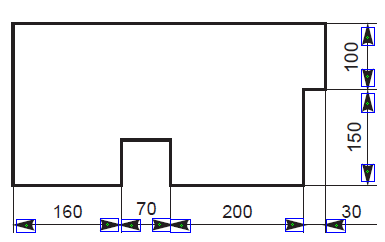

Dimensional Line Detection Started at 07 hr - 36 min - 40 sec...
Dimensional Line Detection Complete...


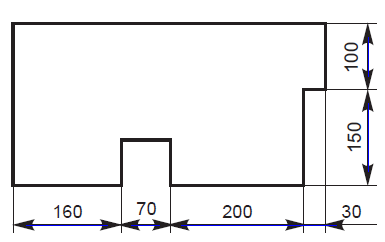

Correlating ArrowHead Direction...
West
East
West
West
West
West
West
West
North
South
North
South
Correlating ArrowHead Direction Complete...
Line Detection Started at 07 hr - 36 min - 40 sec...
Line Detection Complete...


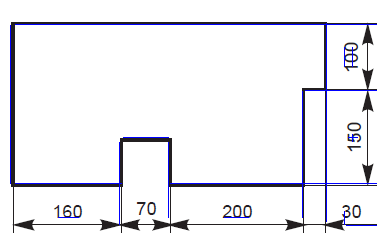

Correction of Broken Ends Started...
Correction of Broken Ends Complete...
Circle Detection Started at 07 hr - 36 min - 41 sec...
Circle Detection Complete...


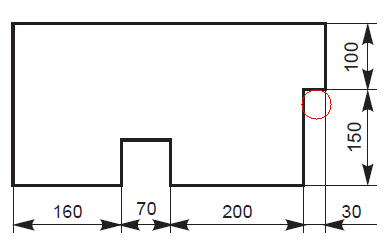

Execution Complete...


In [22]:
global make_dir_root, timestr

def main():

    img_path = "1.png"
    img_path = os.path.abspath(img_path)

    dir = os.path.dirname(img_path)
    os.chdir(dir)
    currentDir = os.getcwd()
    
    timestr = time.strftime("%Y%m%d-%H%M%S")
    Start_time = time.strftime("%H hr - %M min - %S sec")
    print("Script Started at " + Start_time + "...")
    base = os.path.basename(img_path)
    folder_name = os.path.splitext(base)[0]
    print("Image Loaded: " + img_path + "...")
    #print("Making Required Directory...")
    make_dir_Output = r"./Output"
    if not os.path.exists(make_dir_Output):
        os.mkdir(make_dir_Output)
    make_dir_folder = r"./Output/"+folder_name
    make_dir_root = r"./Output/"+folder_name+r"/"+timestr
    if not os.path.exists(make_dir_folder):
        os.mkdir(make_dir_folder)
    os.mkdir(make_dir_root)
        
    #print("Initializing Feature Manager...")
    FM = FeatureManager()
    FM._ImagePath = img_path
    FM._RootDirectory = make_dir_root
    img = cv2.imread(FM._ImagePath)
    FM._ImageOriginal = img
    FM._ImageCleaned = img.copy()
    FM._ImageDetectedDimensionalText = img.copy()
    FM._ImageDetectedCircle = img.copy()
    Erased_Img = img.copy()
    
    AD_Time = time.strftime("%H hr - %M min - %S sec")
    print("Arrow Detection Started at " + AD_Time + "...")
    BB_Arrows, Arrow_Img = ArrowHeadsFeature.Detect(FM)
    FM._DetectedArrowHead = BB_Arrows
    FM._ImageDetectedArrow = Arrow_Img
    print("Arrow Detection Complete...")

    # Convert it to a PIL Image object
    pil_arrow = Image.fromarray(cv2.cvtColor(FM._ImageDetectedArrow, cv2.COLOR_BGR2RGB))

    # Display the PIL Image in the Jupyter Notebook
    display(pil_arrow)
    #cv2.imshow("Detected Arrows", FM._ImageDetectedArrow)
    #cv2.waitKey(0)
    
    for i in BB_Arrows:
        P1 = i._BoundingBoxP1
        P2 = i._BoundingBoxP2
        Erased_Img = Eraser.EraseBox(FM._ImageCleaned, P1, P2)
    FM._ImageCleaned = Erased_Img
    
    DL_Time = time.strftime("%H hr - %M min - %S sec")
    print("Dimensional Line Detection Started at " + DL_Time + "...")    
    segments, DimensionalLine_Img = DimensionalLinesFeature.Detect(FM)
    FM._ImageDetectedDimensionalLine = DimensionalLine_Img
    FM._DetectedDimensionalLine = segments
    print("Dimensional Line Detection Complete...")
    #cv2.imshow("Detected Dimensional Lines", FM._ImageDetectedDimensionalLine)
    #cv2.waitKey(0)
    pil_dim_line = Image.fromarray(cv2.cvtColor(FM._ImageDetectedDimensionalLine, cv2.COLOR_BGR2RGB))

    # Display the PIL Image in the Jupyter Notebook
    display(pil_dim_line)

    for j in segments:
        for i in j._Leaders:
            P1 = i.startPoint
            P2 = i.endPoint
            Erased_Img = Eraser.EraseLine(FM._ImageCleaned, P1, P2)
    FM._ImageCleaned = Erased_Img
    
    print("Correlating ArrowHead Direction...")
    Cognition.ArrowHeadDirection(FM)
    print("Correlating ArrowHead Direction Complete...")
         
    LD_Time = time.strftime("%H hr - %M min - %S sec")
    print("Line Detection Started at " + LD_Time + "...")
    segments, DetectedLine_Img = LineSegmentsFeature.Detect(FM)
    FM._DetectedLine = segments
    FM._ImageDetectedLine = DetectedLine_Img
    print("Line Detection Complete...")
    #cv2.imshow("Detected Lines", FM._ImageDetectedLine)
    #cv2.waitKey(0)
    pil_detect_line = Image.fromarray(cv2.cvtColor(FM._ImageDetectedLine, cv2.COLOR_BGR2RGB))

    # Display the PIL Image in the Jupyter Notebook
    display(pil_detect_line)
    
    print("Correction of Broken Ends Started...")
    Cognition.CorrectEnds(FM)
    print("Correction of Broken Ends Complete...")

    #print("Correction of Broken Ends Stage 2 Started...")
    Cognition.JoinLineSegmentsWithinProximityTolerance(FM) 
    #print("Correction of Broken Ends Stage 2 Complete...")
        
    CD_Time = time.strftime("%H hr - %M min - %S sec")
    print("Circle Detection Started at " + CD_Time + "...")
    detectedcircle, DetectedCircle_Img = CirclesFeature.Detect(FM)
    FM._ImageDetectedCircle = DetectedCircle_Img
    FM._DetectedCircle = detectedcircle
    print("Circle Detection Complete...")
    #cv2.imshow("Detected circles", FM._ImageDetectedCircle)
    #cv2.waitKey(0)
    pil_detect_line = Image.fromarray(cv2.cvtColor(FM._ImageDetectedCircle, cv2.COLOR_BGR2RGB))

    # Display the PIL Image in the Jupyter Notebook
    display(pil_detect_line)

    for i in detectedcircle:
        center = i._centre
        radius = i._radius
        Erased_Img = Eraser.EraseCircle(FM._ImageCleaned, center, radius)
    FM._ImageCleaned = Erased_Img
    
    # print("Exporting Extracted Data to I2C File...")
    # I2CWriter.Write(FM)
    # print("Exporting Complete...")
    
    #print("Exporting Extracted Data to DXF File...")
    DXFWriter.Write(FM)
    #print("Exporting Complete...")
    
    print("Execution Complete...")


# if __name__ == "__main__":
#     main("Debug")
    
if __name__ == "__main__":
    main()

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4>  </h4>
    <h1 id="callout">
        📌Symbol Classification 🗣
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#callout">¶</a>
    </h1>
    <p style="line-height:1.7em;">
        Convolutional Neural Network for Multiclass Imbalanced Dataset Classification of Symbols in 2D Drafting 💭 <br>
    <ol>
        <li>
            Load symbols files
        </li>
        <li>
            Read the file (pixels of symbols)
        </li>
    </ol>
</div>

In [4]:
df =pd.read_csv('Symbols_pixel.csv')

df.head()
df.columns
df.shape

(2431, 10001)

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4 id="italic">
        Let's do a quick EDA
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#italic">¶</a>
    </h4>
    <br>
    <p>
        Generating Headers<br>
        <ol>
            <li><code>This might not be necessary</code></li>
            <li><code>Just for clarity</code> </li>
            <li><code>Show some random symbols (EDA)</code> </li>
        </ol></br>
    </p>
</div>

In [5]:
# get the number df's columns
num_cols = df.shape[1]

# generate range of ints for suffixes
# with length exactly half that of num_cols;
# if num_cols is even, truncate concatenated list later
# to get to original list length
rng = range(1, (num_cols))

new_cols =  ['p_' + str(i) for i in rng]
new_cols.append('label')
# ensure the length of the new columns list is equal to the length of df's columns
df.columns = new_cols[:num_cols]
df.columns

Index(['p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9', 'p_10',
       ...
       'p_9992', 'p_9993', 'p_9994', 'p_9995', 'p_9996', 'p_9997', 'p_9998',
       'p_9999', 'p_10000', 'label'],
      dtype='object', length=10001)

<div style="font-family:verdana; word-spacing:1.5px;">
    <br>
    <h4>
        Data and Labels<br>
    </h4>
</div>

In [6]:
# extract labels (all rows, and last column)
n = df.shape[1] # number of columns 
labels =df['label']

features= df.iloc[:,0:n-1]
type(labels)

pandas.core.series.Series

In [7]:
type(features)

pandas.core.frame.DataFrame

In [8]:
features.head()

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,...,p_9991,p_9992,p_9993,p_9994,p_9995,p_9996,p_9997,p_9998,p_9999,p_10000
0,255,255,255,255,255,255,255,255,255,255,...,255,255,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,255,255,255
2,255,255,255,255,255,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,255,255,255,...,255,255,255,255,255,255,255,255,255,255


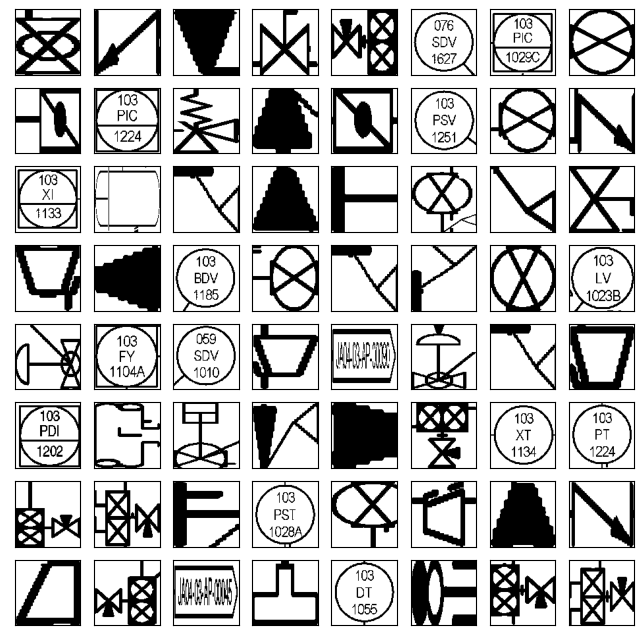

In [9]:
fig, ax = plt.subplots(8, 8, figsize=(8, 8))
fx = features.values # returns numpy array

for i, axi in enumerate(ax.flat):
    value = randint(0, df.shape[0])
    axi.imshow(fx[value].reshape(100,100), cmap='gray')
    axi.set(xticks=[], yticks=[])

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4 id="italic">
        Class distribution
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#italic">¶</a>
    </h4>
</div>

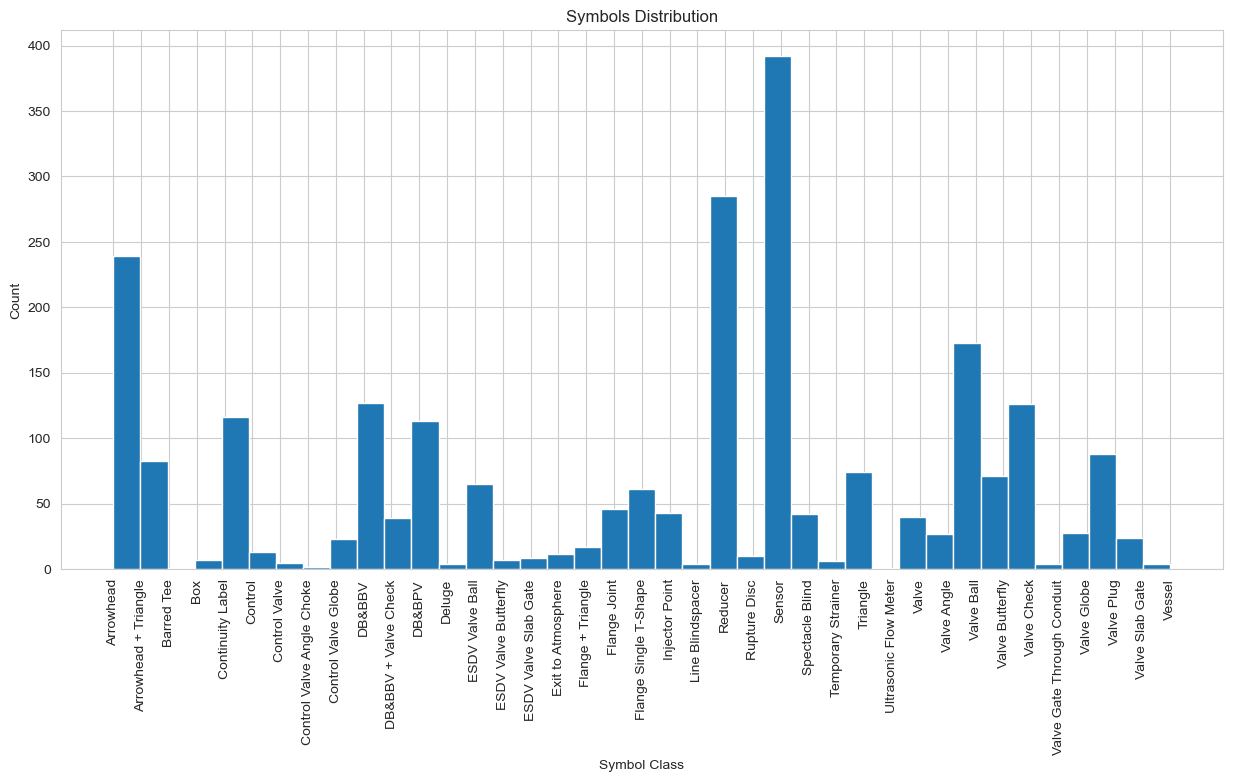

In [10]:
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(15,7))

plt.hist(labels,bins=39)
plt.title('Symbols Distribution')
plt.xlabel('Symbol Class')
plt.ylabel('Count')

plt.xticks(rotation=90)
plt.show()

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4 id="italic">
        Check and remove least frequent symbols 
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#italic">¶</a>
    </h4>
    <br>
    <p>
   <br>
        <ol>
            <li><code>Some classes rarely appear</code></li>
            <li><code>and needs to be removed,</code> </li>
            <li><code>first check the numbers </code> </li>
        </ol></br>
    </p>
</div>

In [11]:
## check class distribution 
df['label'].value_counts()

Sensor                        392
Reducer                       285
Arrowhead                     239
Valve Ball                    173
DB&BBV                        127
Valve Check                   126
Continuity Label              116
DB&BPV                        113
Valve Plug                     88
Arrowhead + Triangle           83
Triangle                       74
Valve Butterfly                71
ESDV Valve Ball                65
Flange Single T-Shape          61
Flange Joint                   46
Injector Point                 43
Spectacle Blind                42
Valve                          40
DB&BBV + Valve Check           39
Valve Globe                    28
Valve Angle                    27
Valve Slab Gate                24
Control Valve Globe            23
Flange + Triangle              17
Control                        13
Exit to Atmosphere             12
Rupture Disc                   10
ESDV Valve Slab Gate            9
ESDV Valve Butterfly            7
Box           

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4 id="italic">
        Remove symbols with less than 7 instances in the dataset
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#italic">¶</a>
    </h4>
</div>

In [13]:

df = df[~df['label'].isin(['Ultrasonic Flow Meter', 'Barred Tee','Temporary Strainer',
                     'Control Valve Angle Choke','Line Blindspacer',
                     'Vessel','Valve Gate Through Conduit','Deluge','Control Valve'])]

df['label'].value_counts()

Sensor                   392
Reducer                  285
Arrowhead                239
Valve Ball               173
DB&BBV                   127
Valve Check              126
Continuity Label         116
DB&BPV                   113
Valve Plug                88
Arrowhead + Triangle      83
Triangle                  74
Valve Butterfly           71
ESDV Valve Ball           65
Flange Single T-Shape     61
Flange Joint              46
Injector Point            43
Spectacle Blind           42
Valve                     40
DB&BBV + Valve Check      39
Valve Globe               28
Valve Angle               27
Valve Slab Gate           24
Control Valve Globe       23
Flange + Triangle         17
Control                   13
Exit to Atmosphere        12
Rupture Disc              10
ESDV Valve Slab Gate       9
ESDV Valve Butterfly       7
Box                        7
Name: label, dtype: int64

<div style="font-family:verdana; word-spacing:1.5px;">
    <br>
    <h4>
        Neural Networks (CNNs)</h4><p><br>
        <ol>
            <li><code>Prepare the dataset</code> </li>
            <li><code>check the shapes</code> </li>
        </ol></br>
    </p>
</div>

In [14]:
# labels and features (separate data frames)
# retrieve numpy array (to meet keras requirements )
dataset = df.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

print(X.shape)
print(y.shape)

(2400, 10000)
(2400,)


In [15]:
print(f'There are {len(df.label.unique())} Unique Symbol in the dataset') # check number of labels 

There are 30 Unique Symbol in the dataset


<div style="font-family:verdana; word-spacing:1.5px;">
    <h4 id="italic">
         Prepare the data for the model
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#italic">¶</a>
    </h4>
    <ol> <li>Check the shapes of the input</li>
        <li>Split the data into train/ test subsets</li>
        <li>Reshape the data</li>
        <li>Prepare targets (labels)</li>
    </ol>
        
</div>

In [16]:
from sklearn.model_selection import train_test_split

# simple functions to check the shapes of all compoents of the dataset (train, test, labels)
def data_summary(X_train, y_train, X_test, y_test):
    """Summarize current state of dataset"""
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    
# split the data and check the shapes of results sets  
# train_test_split(...) returns numpy arrays 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
data_summary(X_train,y_train,X_test,y_test)

Train images shape: (1920, 10000)
Train labels shape: (1920,)
Test images shape: (480, 10000)
Test labels shape: (480,)


<div style="font-family:verdana; word-spacing:1.5px;">
    <h4 id="italic">
         Prepare the data for the model
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#italic">¶</a>
    </h4>
    <ol> <li>Reshape the data</li>
        <li>Prepare targets (labels)</li>
        <li>Check shape of the arrays before and after </li>
    </ol>
        
</div>

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils


print('X_train ',X_train.shape)
print('y_train ',y_train.shape)
print('X-test ',X_test.shape)
print('y_test ',y_test.shape)

X_train = X_train.reshape(X_train.shape[0], 100,100,1)
X_test = X_test.reshape(X_test.shape[0], 100,100,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


print('___ AFTER RESHAPE________')
print('X_train ',X_train.shape)
print('y_train ',y_train.shape)
print('X-test ',X_test.shape)
print('y_test ',y_test.shape)

X_train  (1920, 10000)
y_train  (1920,)
X-test  (480, 10000)
y_test  (480,)
___ AFTER RESHAPE________
X_train  (1920, 100, 100, 1)
y_train  (1920,)
X-test  (480, 100, 100, 1)
y_test  (480,)


<div style="font-family:verdana; word-spacing:1.5px;">
    <h4 id="italic">
         Prepare the data for the model
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#italic">¶</a>
    </h4>
    <ol> <li>String labels have to be encoded first</li>
        <li>Prepare targets (labels)</li>
    </ol>
        
</div>

In [19]:
# Encode target variables 
# prepare target
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

y_train_cat = y_train
y_test_cat = y_test

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

y_train, y_test = prepare_targets(y_train,y_test)

print('y_train ',y_train.shape)
print('y_test ',y_test.shape)

y_train  (1920,)
y_test  (480,)


<div style="font-family:verdana; word-spacing:1.5px;">
    <h4 id="italic">
         Encode Labels Data
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#italic">¶</a>
    </h4>
    <p>Notice how the shape of the arrays changes </p>
        
</div>

In [20]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print('y_train ',y_train.shape)
print('y_test ',y_test.shape)

y_train  (1920, 30)
y_test  (480, 30)


### Validation Set

In [22]:
# shuffle the training dataset (5 times!)

for _ in range(5): 
    indexes = np.random.permutation(len(X_train))

X_train = X_train[indexes]
y_train = y_train[indexes]

# Keep 10% of the training data for validation 
# cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(X_train))

# Validation set (val_data)
val_data = X_train[:val_count,:]
val_labels_cat = y_train[:val_count,:]

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4 id="italic">
        Build Model 
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#italic">¶</a>
    </h4>
    <p>Train, validate and testing sets</p>
        
</div>

In [24]:
def build_modelU():
    model = Sequential()
    # add Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(100, 100, 1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Flatten())
    # Densely connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile with adam optimizer & categorical_crossentropy loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_modelU()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 128)       7

In [25]:
nEpochs = 25 
results = model.fit(X_train, y_train, 
                    epochs=nEpochs, batch_size=64,
                    validation_data=(val_data, val_labels_cat))

Epoch 1/25
30/30 [==============================] - 78s 3s/step - loss: 5.1570 - accuracy: 0.2286 - val_loss: 1.9909 - val_accuracy: 0.4635
Epoch 2/25
30/30 [==============================] - 92s 3s/step - loss: 1.8906 - accuracy: 0.4818 - val_loss: 1.2447 - val_accuracy: 0.6719
Epoch 3/25
30/30 [==============================] - 88s 3s/step - loss: 1.4407 - accuracy: 0.5984 - val_loss: 0.8844 - val_accuracy: 0.7865
Epoch 4/25
30/30 [==============================] - 86s 3s/step - loss: 1.1136 - accuracy: 0.6828 - val_loss: 0.5805 - val_accuracy: 0.8750
Epoch 5/25
30/30 [==============================] - 86s 3s/step - loss: 0.8623 - accuracy: 0.7526 - val_loss: 0.4035 - val_accuracy: 0.9115
Epoch 6/25
30/30 [==============================] - 88s 3s/step - loss: 0.7069 - accuracy: 0.7911 - val_loss: 0.3340 - val_accuracy: 0.9323
Epoch 7/25
30/30 [==============================] - 89s 3s/step - loss: 0.6043 - accuracy: 0.8266 - val_loss: 0.2357 - val_accuracy: 0.9479
Epoch 8/25
30/30 [==

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4 id="italic">
         Check Results
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#italic">¶</a>
    </h4>
</div>

![Stay Home](https://cdn.dribbble.com/users/1719/screenshots/1947376/results.png?resize=800x600&vertical=center)
<cite>Image from www.dribbble.com by Helvetic Brands</cite>)

In [26]:
history_dict = results.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [27]:
# accuracy, test 
test_loss, test_accuracy = \
  model.evaluate(X_test, y_test, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

8/8 [==============================] - 6s 667ms/step - loss: 0.2038 - accuracy: 0.9542
Test loss: 0.2038 accuracy: 0.9542


<div style="font-family:verdana; word-spacing:1.5px;">
    <h4 id="italic">
         Make Predictions
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#italic">¶</a>
    </h4>
        
</div>

![Stay Home](https://cdn.dribbble.com/userupload/6892301/file/original-e75e5cd1276625c90904602e06e642d8.jpg?resize=450x338&vertical=center)
<cite>Image from www.dribbble.com by John Martin</cite>)

In [33]:
predictions = model.predict(X_test)
preds = np.argmax(predictions, axis=1)
actuals = np.argmax(y_test,axis=1)
print('Accuracy: ',sum(preds==actuals)/X_test.shape[0])

15/15 [==============================] - 7s 458ms/step
Accuracy:  0.9541666666666667


In [37]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

predictions = model.predict(X_test)
preds = np.argmax(predictions, axis=1)
actuals = np.argmax(y_test,axis=1)
#print(confusion_matrix(preds,preds))

# correctly identified symbols
print('Correctly Identified Symbols: ',(np.argmax(predictions, axis=1) == \
                        np.argmax(y_test,axis=1)).sum())
print('Incorrectly Identified Symbols: ',(np.argmax(predictions, axis=1) != \
                        np.argmax(y_test,axis=1)).sum())

Test accuracy: 0.9541666507720947
15/15 [==============================] - 7s 436ms/step
Correctly Identified Symbols:  458
Incorrectly Identified Symbols:  22


In [ ]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

predictions = model.predict(X_train)
preds = np.argmax(predictions, axis=1)
actuals = np.argmax(y_train,axis=1)
#print(confusion_matrix(preds,actuals))

# correctly identified symbols
#print('Correctly Identified Symbols: ',(np.argmax(predictions, axis=1) == np.argmax(y_test,axis=1)).sum())
print('Incorrectly Identified Symbols: ',(np.argmax(predictions, axis=1) != np.argmax(y_train,axis=1)).sum())

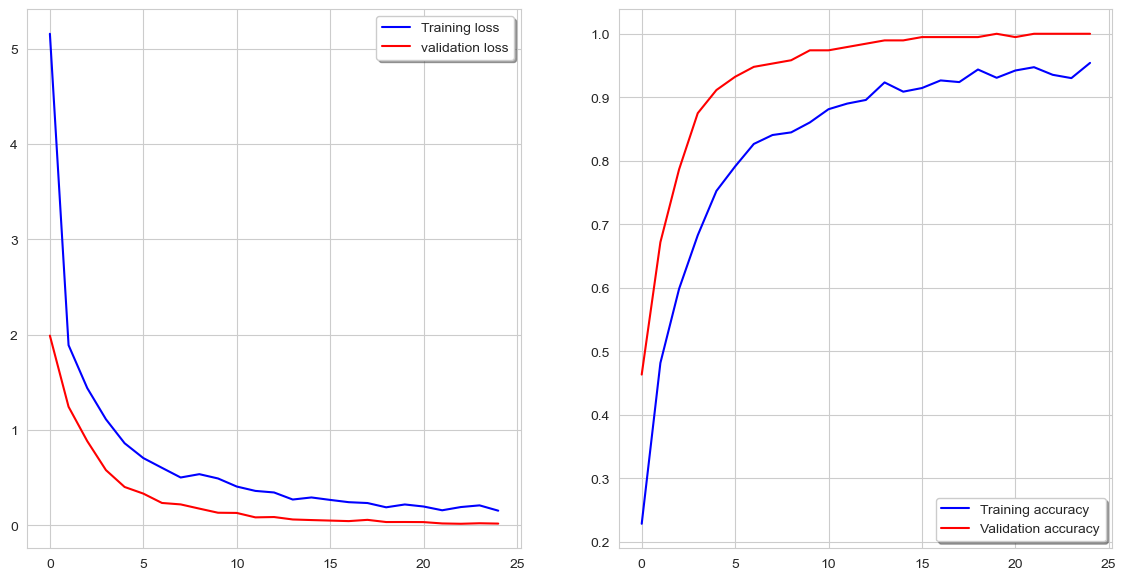

In [31]:
# Plot the loss and accuracy curves for training and validation 
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,2, figsize=(14, 7))
ax[0].plot(results.history['loss'], color='b', label="Training loss")
ax[0].plot(results.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(results.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(results.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4 id="italic">
         Show some Predictions
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#italic">¶</a>
    </h4>
        
</div>

15/15 [==============================] - 6s 369ms/step


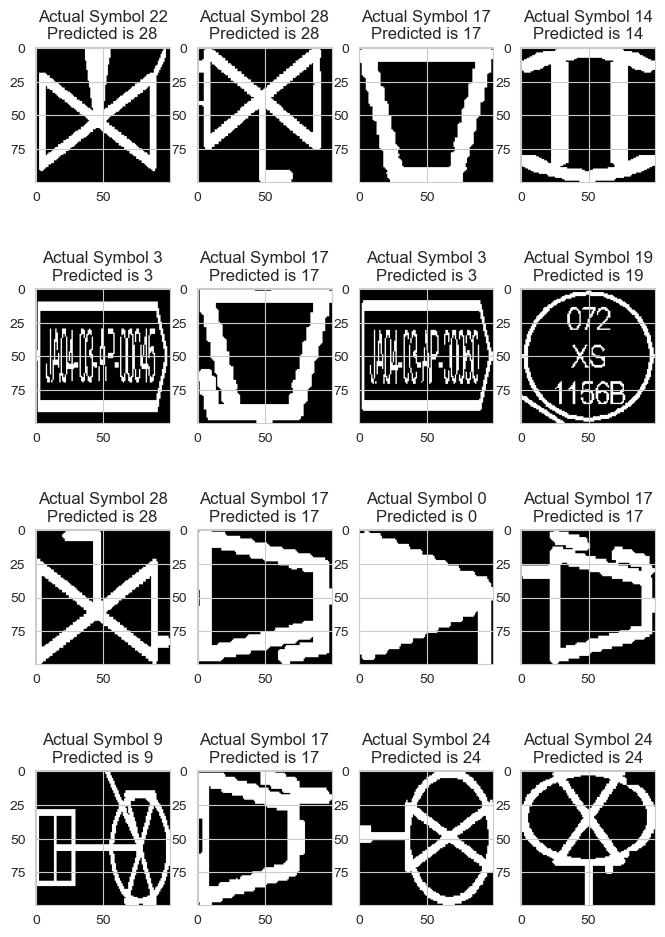

In [32]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 100, 100)

fig, axis = plt.subplots(4, 4, figsize=(8, 12))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Actual Symbol {y_test[i].argmax()}\nPredicted is {y_pred[i].argmax()}");